# Rice Variety Classification #

### Introduction ###
    In this project, we are using basic machine learning concepts with the help of some libraries (scikit-learn, Matplotlib, Seaborn). Machine learning is training computers with only inputs and outputs(no knowledge of how the program works).
    For classification, we will use  K-Nearest Neighbor, Naive Bayes, Random Forest, and Support Vector Machine algorithms. There are total of  75,000 samples in the given dataset and it must be split into training (80%) and testing (20%) sets randomly. This project consists of two parts:

### PART 1: Textual Data Analysis ###
    In this part, we have 106 features with corresponding classes in the dataset. First we will import the needed libraries.

In [1]:


import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import glob
import cv2
import mahotas
import pkg_resources
import subprocess
import sys
import scipy
import skimage
import sklearn
import warnings


from scipy import stats
from scipy.stats.mstats import winsorize

from skimage.color import rgb2gray, rgb2hsv
from skimage.feature import local_binary_pattern
from skimage import io, measure


from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

print("Python:", sys.version)
print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("seaborn:", sns.__version__)
print("matplotlib:", matplotlib.__version__)
print("OpenCV (cv2):", cv2.__version__)
print("mahotas:", mahotas.__version__)
print("scipy:", scipy.__version__)
print("scikit-image:", skimage.__version__)
print("scikit-learn:", sklearn.__version__)


C:\Users\yaren\AppData\Local\Temp\ipykernel_6624\3502867435.py:11: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


Python: 3.9.21 (main, Dec 11 2024, 16:35:24) [MSC v.1929 64 bit (AMD64)]
pandas: 2.2.3
numpy: 2.0.2
seaborn: 0.13.2
matplotlib: 3.9.4
OpenCV (cv2): 4.11.0
mahotas: 1.4.18
scipy: 1.13.1
scikit-image: 0.24.0
scikit-learn: 1.6.1


---
Now we can load the dataset and get some general information about the data.

In [2]:
# Loading the dataset
df = pd.read_csv("data/part_i.csv")

In [3]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,ALLdaub4L,ALLdaub4a,ALLdaub4b,ALLdaub4Y,ALLdaub4Cb,ALLdaub4Cr,ALLdaub4XX,ALLdaub4YY,ALLdaub4ZZ,CLASS
0,7805,437.915,209.8215,48.0221,0.9735,99.6877,0.9775,7985,0.3547,4.3693,...,113.9924,65.0610,59.5989,104.8552,67.8779,63.0828,0.3673,0.3793,0.4733,Basmati
1,7503,340.757,138.3361,69.8417,0.8632,97.7400,0.9660,7767,0.6637,1.9807,...,105.7055,64.3685,62.2084,96.8375,65.5371,63.5832,0.3014,0.3144,0.3641,Arborio
2,5124,314.617,141.9803,46.5784,0.9447,80.7718,0.9721,5271,0.4760,3.0482,...,109.7155,62.6423,58.7439,100.2352,68.9753,59.8342,0.3233,0.3445,0.4448,Jasmine
3,7990,437.085,201.4386,51.2245,0.9671,100.8622,0.9659,8272,0.6274,3.9325,...,116.5405,64.9069,60.2562,107.2560,67.3298,63.2237,0.3880,0.4020,0.4904,Basmati
4,7433,342.893,140.3350,68.3927,0.8732,97.2830,0.9831,7561,0.6006,2.0519,...,107.7502,64.7071,61.3549,98.8704,66.2048,63.5378,0.3184,0.3303,0.3928,Arborio


In [4]:
df.tail()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,ALLdaub4L,ALLdaub4a,ALLdaub4b,ALLdaub4Y,ALLdaub4Cb,ALLdaub4Cr,ALLdaub4XX,ALLdaub4YY,ALLdaub4ZZ,CLASS
74995,5551,285.911,114.1695,62.9079,0.8345,84.0699,0.9846,5638,0.6418,1.8149,...,103.9529,64.9225,62.4355,95.2780,65.5114,64.4457,0.2895,0.2997,0.3455,Arborio
74996,7696,322.703,121.3900,81.1375,0.7438,98.9892,0.9868,7799,0.7309,1.4961,...,108.9778,65.4571,59.9502,100.2301,67.5089,63.6028,0.3335,0.3426,0.4257,Karacadag
74997,7579,339.295,136.3125,71.2866,0.8524,98.2338,0.9805,7730,0.6399,1.9122,...,106.0881,64.1869,61.3876,97.1585,66.2445,63.0596,0.3028,0.3164,0.3761,Arborio
74998,15174,489.502,200.9486,97.6282,0.8740,138.9969,0.9766,15537,0.7903,2.0583,...,119.2037,63.3545,64.8200,109.3027,63.3122,63.5967,0.3970,0.4215,0.4469,Ipsala
74999,12931,452.635,185.5138,90.2651,0.8736,128.3131,0.9760,13249,0.7640,2.0552,...,121.4198,63.5424,65.2355,111.4580,63.0129,63.9117,0.4162,0.4414,0.4626,Ipsala


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Columns: 107 entries, AREA to CLASS
dtypes: float64(95), int64(11), object(1)
memory usage: 61.2+ MB


In [6]:
df.shape

(75000, 107)

In [7]:
df.columns

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       ...
       'ALLdaub4L', 'ALLdaub4a', 'ALLdaub4b', 'ALLdaub4Y', 'ALLdaub4Cb',
       'ALLdaub4Cr', 'ALLdaub4XX', 'ALLdaub4YY', 'ALLdaub4ZZ', 'CLASS'],
      dtype='object', length=107)

In [8]:
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,ALLdaub4V,ALLdaub4L,ALLdaub4a,ALLdaub4b,ALLdaub4Y,ALLdaub4Cb,ALLdaub4Cr,ALLdaub4XX,ALLdaub4YY,ALLdaub4ZZ
count,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,...,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000
mean,8379.197507,378.169453,161.805540,66.829335,0.886077,101.731251,0.975896,8584.862320,0.633226,2.597063,...,0.448960,111.088252,64.379443,61.461457,101.925425,66.240541,63.202088,0.341944,0.357058,0.421176
std,3119.209274,70.597008,36.461005,16.689269,0.071906,17.874070,0.007966,3189.298025,0.123795,0.968982,...,0.021736,5.904854,1.175616,2.435635,5.436861,2.159109,1.174976,0.041921,0.047139,0.043137
min,3929.000000,261.040000,96.968300,34.673000,0.627700,70.728800,0.877500,4032.000000,0.278800,1.284500,...,0.313900,82.300600,59.137900,53.653800,75.191800,58.323800,57.363400,0.159700,0.169000,0.191800
25%,6259.000000,316.431500,132.623500,49.650200,0.846100,89.270400,0.970900,6385.000000,0.561000,1.876100,...,0.434200,106.632900,63.883800,59.465575,97.834400,64.842000,63.052800,0.309900,0.320900,0.391200
50%,7345.000000,351.261000,149.343950,69.183900,0.885600,96.705500,0.976400,7532.000000,0.655800,2.153200,...,0.451600,110.770700,64.419350,61.424400,101.683700,66.291600,63.522050,0.340100,0.353300,0.424200
75%,8901.000000,444.986000,197.462025,75.814125,0.950800,106.457100,0.982200,9153.000000,0.727800,3.228700,...,0.466100,115.065075,65.174200,63.076825,105.592450,68.011800,63.734000,0.370300,0.387900,0.454700
max,21019.000000,593.698000,255.647200,113.441100,0.986800,163.591600,0.992100,21633.000000,0.901700,6.179500,...,0.495100,126.265100,67.459000,70.284000,116.287300,73.424700,66.539100,0.463900,0.488600,0.530200


- Since CLASS column is not numerical, we are excluding it and select only the numerical columns. Then, we detect the outliers using seaborn library and plot them using Boxplot. Outliers mean that the data points that are deviated significantly from the majority of the data.


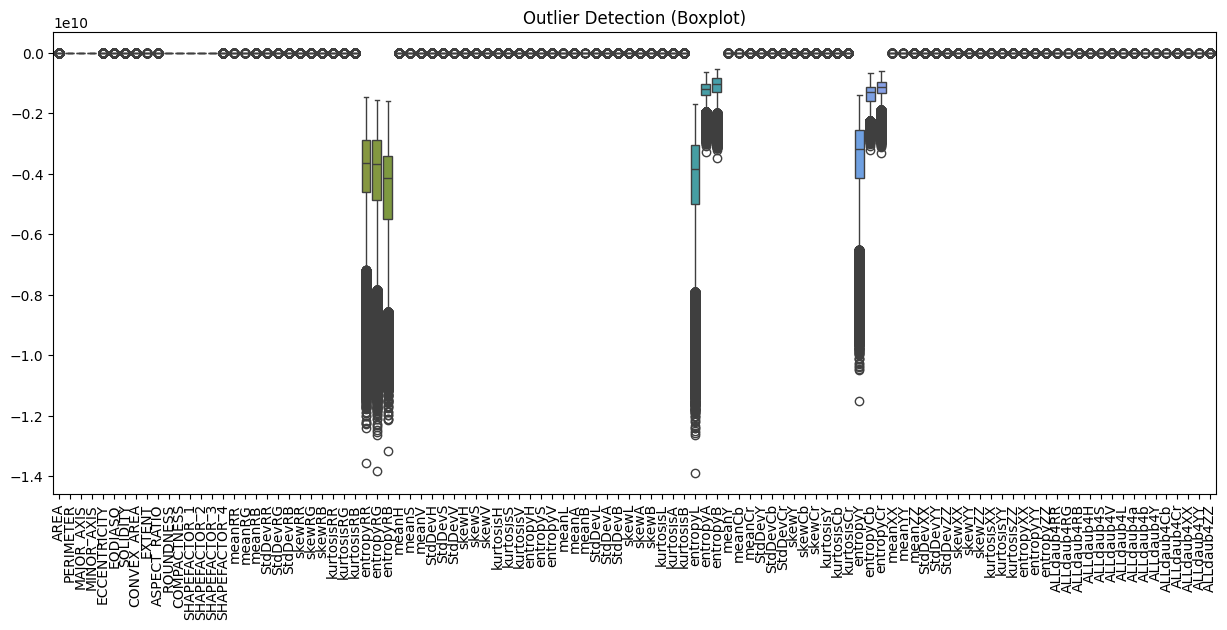

Outliers have been replaced using winsorization (whispering method).
               AREA     PERIMETER    MAJOR_AXIS    MINOR_AXIS  ECCENTRICITY  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean    8343.866493    377.821513    161.640357     66.774479      0.887013   
std     3018.809674     68.968931     35.725637     16.280569      0.069426   
min     5168.000000    291.046000    111.077700     44.875200      0.753300   
25%     6259.000000    316.431500    132.623500     49.650200      0.846100   
50%     7345.000000    351.261000    149.343950     69.183900      0.885600   
75%     8901.000000    444.986000    197.462025     75.814125      0.950800   
max    15062.000000    493.954000    215.613200     96.190100      0.974400   

            EQDIASQ      SOLIDITY   CONVEX_AREA        EXTENT  ASPECT_RATIO  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean     101.587450      0.976117   8548.713960      0.633616

In [9]:
# Select numeric colums
numeric_columns = df.select_dtypes(include=[np.number]).columns

# visualize outliers with boxplot
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=90)
plt.title("Outlier Detection (Boxplot)")
plt.show()


warnings.filterwarnings("ignore", message="Warning: 'partition' will ignore the 'mask' of the MaskedArray.")

# Let's apply winsorization (whispering method) for each numeric column
# For example, a 5% cut is applied from both ends. (limits=(0.05, 0.05))
for col in numeric_columns:
    df[col] = winsorize(df[col], limits=(0.05, 0.05))

print("Outliers have been replaced using winsorization (whispering method).")


print(df.describe())



### Outlier Treatment using Winsorization (Whispering Method)

Outliers in numerical features were addressed using the winsorization method, also known as the "whispering method." Instead of removing or replacing extreme values with the column mean, winsorization limits the values to a specified range (e.g., the 5th and 95th percentiles). This approach preserves the overall data distribution while reducing the adverse impact of extreme values on model performance.

---


We calculate the correlation matrix and visualize it using heatmap. Correlation coefficients ranges from -1 to 1. 1 means perfect positive correlation(if one variable increases, other variable increases aas well). -1 means the exact opposite. 0 means there is no correlation between the two variables.

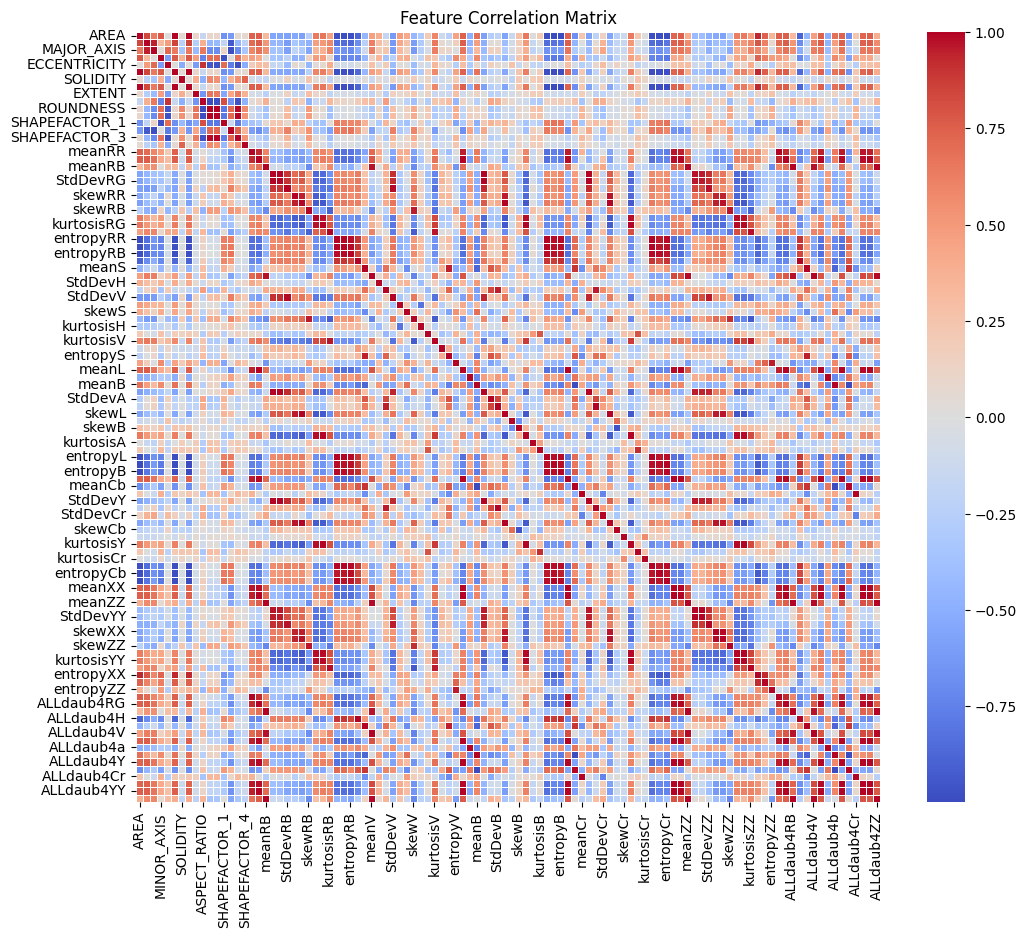

In [10]:
# Calculating correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Visualize correlation matrix (50*50)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()



Since the features with high correlation cause redundancy, we identify and eliminate them using a threshold( any correlation greater than this threshold value will be considered high-correlation).

In [11]:
#Identifying and eliminating features with high correlation (above 0.95)
high_corr_features = set()
threshold = 0.95

for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_features.add(correlation_matrix.columns[j])

# Remove features with high correlation
df_cleaned = df.drop(columns=high_corr_features, errors='ignore')

# Print the number of updated features
print(f"\nPrevious number of features: {df.shape[1]}, New number of features: {df_cleaned.shape[1]}")

# Show the removed features
print("\nRemoved High Correlation Features:")
print(list(high_corr_features))



Previous number of features: 107, New number of features: 43

Removed High Correlation Features:
['entropyZZ', 'entropyCb', 'kurtosisL', 'COMPACTNESS', 'kurtosisRG', 'ALLdaub4Cb', 'ALLdaub4Cr', 'ALLdaub4V', 'entropyS', 'ALLdaub4S', 'entropyL', 'skewCb', 'skewZZ', 'ALLdaub4RR', 'StdDevZZ', 'ALLdaub4L', 'StdDevCb', 'entropyRR', 'ALLdaub4a', 'entropyRG', 'SHAPEFACTOR_1', 'StdDevYY', 'SHAPEFACTOR_2', 'meanYY', 'ALLdaub4b', 'meanL', 'meanZZ', 'kurtosisXX', 'meanXX', 'ROUNDNESS', 'ALLdaub4Y', 'StdDevB', 'EQDIASQ', 'StdDevL', 'skewRG', 'StdDevRG', 'CONVEX_AREA', 'skewL', 'ALLdaub4H', 'skewYY', 'entropyA', 'StdDevXX', 'entropyCr', 'ALLdaub4RB', 'ALLdaub4ZZ', 'ALLdaub4YY', 'StdDevY', 'StdDevV', 'skewY', 'skewXX', 'kurtosisYY', 'meanCb', 'SHAPEFACTOR_3', 'meanY', 'skewV', 'ALLdaub4XX', 'kurtosisV', 'kurtosisZZ', 'ALLdaub4RG', 'meanV', 'kurtosisY', 'entropyY', 'entropyB', 'entropyRB']


In [12]:
df['CLASS'].value_counts()

CLASS
Basmati      15000
Arborio      15000
Jasmine      15000
Ipsala       15000
Karacadag    15000
Name: count, dtype: int64

In [13]:
df.isnull().sum()

AREA            0
PERIMETER       0
MAJOR_AXIS      0
MINOR_AXIS      0
ECCENTRICITY    0
               ..
ALLdaub4Cr      0
ALLdaub4XX      0
ALLdaub4YY      0
ALLdaub4ZZ      0
CLASS           0
Length: 107, dtype: int64

---
We need to identify null and infinite values, since they affect the results. After identifying, we can eliminate them or fill the missing values. We chose to fill for this project:

In [14]:
encoder = LabelEncoder()
df["CLASS"] = encoder.fit_transform(df["CLASS"])  # Convert the "CLASS" column to numbers

# Count all NaN values
nan_count = np.isnan(df.to_numpy()).sum()

# Count all infinite (inf) values
inf_count = np.isinf(df.to_numpy()).sum()

print(f"Total NaN Count: {nan_count}")
print(f"Total Inf Count: {inf_count}")

Total NaN Count: 0
Total Inf Count: 0


In [15]:
df.fillna(df.mean(), inplace=True)  # Fill the missing values with column means

In [16]:
# Count all NaN values
nan_count = np.isnan(df.to_numpy()).sum()

# Count all infinite (inf) values
inf_count = np.isinf(df.to_numpy()).sum()

print(f"Total NaN Count: {nan_count}")
print(f"Total Inf Count: {inf_count}")

Total NaN Count: 0
Total Inf Count: 0


We can look at the class distributions:

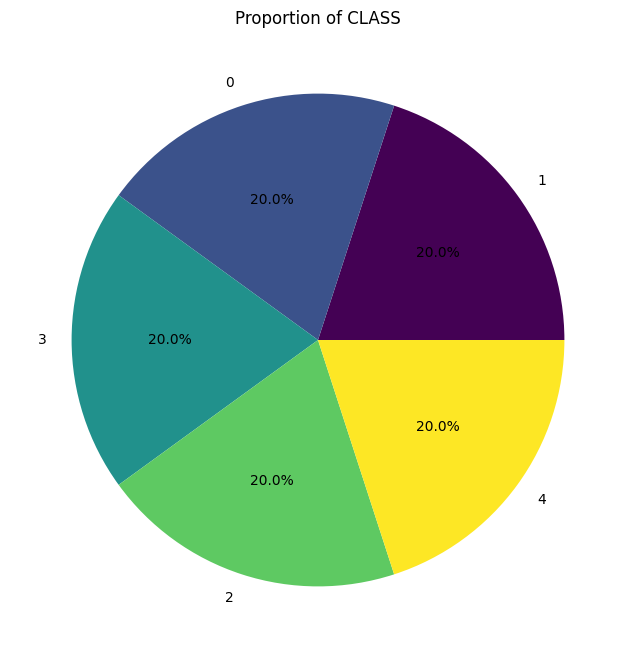

In [17]:
column_name = "CLASS"
df[column_name].value_counts().plot.pie(autopct="%1.1f%%", figsize=(8,8), cmap="viridis")
plt.title(f"Proportion of {column_name}")
plt.ylabel("")  # Hide y-label
plt.show()

---
After preprocessing the dataset, we begin the actual process. Firstly, we need to split the dataset into training(80%) and test(20%) sets. We cant to compare the original data and the scaled data, so we store them seperately.

In [18]:
# Split features and target variable
X = df.drop(columns=["CLASS"])
y = df["CLASS"]

In [19]:
# Train-Test Split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)
X_test_scaled = scaler.transform(X_test_raw)

---
To evaluate the model performance more correctly, we use k-fold cross validation. k-fold divides dataset into k subsets. The model trains and tests k times total. At each time, it uses a different fold as test and the remaining folds as training.

In [21]:
# 5-Fold Cross Validation settings
k = 5  
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Basic performance metrics
scoring_metrics = {
    "Accuracy": make_scorer(accuracy_score),
    "Precision": make_scorer(precision_score, average='weighted'),
    "Recall": make_scorer(recall_score, average='weighted'),
    "F1-Score": make_scorer(f1_score, average='weighted')
}
# Evaluation function: performs cross-validation on the specified data
def evaluate_model_cv_all(model, X, y, cv_folds=5):
    
    cv = KFold(n_splits=cv_folds, shuffle=True, random_state=42)
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring_metrics)
    fold_results = []
    n_folds = len(scores['test_Accuracy'])
    for i in range(n_folds):
        fold_results.append({
            metric: scores[f'test_{metric}'][i] for metric in scoring_metrics.keys()
        })
    return fold_results


- We start our classifications with KNN. KNN(K-Nearest Neighbor) is widely used algorithm in machine learning. K is some number(e.g. 5, 10). After splitting whole data, the machine trains with training data(80% of data) and uses this knowledge to decide the class of unlabeled data in testing set. To do this step, it looks to nearest k labeled data for each unlabeled data and then label them as a result.
- There are some important key points: If number k is too small, it can lead to overfitting because of the noise(model becomes overly sensitive). Also too large k can lead to underfitting(model becomes too generalized).
    Note: we do all classifications on both raw and scaled data to compare the results.

In [24]:
# Standard KNN Model
knn = KNeighborsClassifier(n_neighbors=5)

# --- Training and Testing with Raw Data ---
knn.fit(X_train_raw, y_train)
y_pred_raw = knn.predict(X_test_raw)
knn_metrics_raw = {
    "Accuracy": accuracy_score(y_test, y_pred_raw),
    "Precision": precision_score(y_test, y_pred_raw, average='weighted'),
    "Recall": recall_score(y_test, y_pred_raw, average='weighted'),
    "F1-Score": f1_score(y_test, y_pred_raw, average='weighted')
}

df_knn_raw = pd.DataFrame([knn_metrics_raw])
print("KNN (Raw Data) Metrics:")
print(df_knn_raw.to_string(index=False))

# --- Training and Testing with Scaled Data ---
knn.fit(X_train_scaled, y_train)
y_pred_scaled = knn.predict(X_test_scaled)
knn_metrics_scaled = {
    "Accuracy": accuracy_score(y_test, y_pred_scaled),
    "Precision": precision_score(y_test, y_pred_scaled, average='weighted'),
    "Recall": recall_score(y_test, y_pred_scaled, average='weighted'),
    "F1-Score": f1_score(y_test, y_pred_scaled, average='weighted')
}

df_knn_scaled = pd.DataFrame([knn_metrics_scaled])
print("\nKNN (Scaled Data) Metrics:")
print(df_knn_scaled.to_string(index=False))



# --- Cross Validation Evaluation ---

print("\nKNN Cross Validation (Raw Data):")
knn_cv_results_raw = evaluate_model_cv_all(knn, X_train_raw, y_train)
df_knn_cv_raw = pd.DataFrame(knn_cv_results_raw, index=[f"CV{i}" for i in range(1, len(knn_cv_results_raw)+1)])
print("\nKNN Cross Validation (Raw Data):")
print(df_knn_cv_raw.to_string())

print("\nKNN Cross Validation (Scaled Data):")
knn_cv_results_scaled = evaluate_model_cv_all(knn, X_train_scaled, y_train)
df_knn_cv_scaled = pd.DataFrame(knn_cv_results_scaled, index=[f"CV{i}" for i in range(1, len(knn_cv_results_scaled)+1)])
print("\nKNN Cross Validation (Scaled Data):")
print(df_knn_cv_scaled.to_string())


KNN (Raw Data) Metrics:
 Accuracy  Precision   Recall  F1-Score
 0.922867   0.922333 0.922867  0.922306

KNN (Scaled Data) Metrics:
 Accuracy  Precision   Recall  F1-Score
 0.997333   0.997341 0.997333  0.997335

KNN Cross Validation (Raw Data):

KNN Cross Validation (Raw Data):
     Accuracy  Precision    Recall  F1-Score
CV1  0.923500   0.922886  0.923500  0.922975
CV2  0.921833   0.921435  0.921833  0.921297
CV3  0.921250   0.920833  0.921250  0.920619
CV4  0.923833   0.923360  0.923833  0.923405
CV5  0.923333   0.922948  0.923333  0.922744

KNN Cross Validation (Scaled Data):

KNN Cross Validation (Scaled Data):
     Accuracy  Precision    Recall  F1-Score
CV1  0.997667   0.997672  0.997667  0.997668
CV2  0.998083   0.998085  0.998083  0.998084
CV3  0.997417   0.997429  0.997417  0.997418
CV4  0.998333   0.998335  0.998333  0.998334
CV5  0.997167   0.997171  0.997167  0.997168


---
    
- Weighted KNN is a modified version of standard KNN classification model. Weighted KNN not only considers the nearest neighbors but also how close or far away they are. We give higher weights to closer points and lower weights to farther points. This way, closer neighbors get to have a stronger influence on the prediction.

In [25]:
#  Weighted KNN Model
weighted_knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

# --- Training and Testing with Raw Data ---
weighted_knn.fit(X_train_raw, y_train)
y_pred_raw = weighted_knn.predict(X_test_raw)
weighted_knn_metrics_raw = {
    "Accuracy": accuracy_score(y_test, y_pred_raw),
    "Precision": precision_score(y_test, y_pred_raw, average='weighted'),
    "Recall": recall_score(y_test, y_pred_raw, average='weighted'),
    "F1-Score": f1_score(y_test, y_pred_raw, average='weighted')
}
df_weighted_knn_raw = pd.DataFrame([weighted_knn_metrics_raw])
print("Weighted KNN (Raw Data) Metrics:")
print(df_weighted_knn_raw.to_string())

# --- Training and Testing with Scaled Data ---
weighted_knn.fit(X_train_scaled, y_train)
y_pred_scaled = weighted_knn.predict(X_test_scaled)
weighted_knn_metrics_scaled = {
    "Accuracy": accuracy_score(y_test, y_pred_scaled),
    "Precision": precision_score(y_test, y_pred_scaled, average='weighted'),
    "Recall": recall_score(y_test, y_pred_scaled, average='weighted'),
    "F1-Score": f1_score(y_test, y_pred_scaled, average='weighted')
}
df_weighted_knn_scaled = pd.DataFrame([weighted_knn_metrics_scaled])
print("\nWeighted KNN (Scaled Data) Metrics:")
print(df_weighted_knn_scaled.to_string())


# --- Cross Validation Evaluation ---

print("\nWeighted KNN Cross Validation (Raw Data):")
weighted_knn_cv_results_raw = evaluate_model_cv_all(weighted_knn, X_train_raw, y_train)
df_w_knn_cv_raw = pd.DataFrame(weighted_knn_cv_results_raw, index=[f"CV{i}" for i in range(1, len(weighted_knn_cv_results_raw)+1)])
print(df_w_knn_cv_raw.to_string())

print("\nWeighted KNN Cross Validation (Scaled Data):")
weighted_knn_cv_results_scaled = evaluate_model_cv_all(weighted_knn, X_train_scaled, y_train)
df_w_knn_cv_scaled = pd.DataFrame(weighted_knn_cv_results_scaled, index=[f"CV{i}" for i in range(1, len(weighted_knn_cv_results_scaled)+1)])
print(df_w_knn_cv_scaled.to_string())


Weighted KNN (Raw Data) Metrics:
   Accuracy  Precision    Recall  F1-Score
0  0.922467   0.921996  0.922467  0.922005

Weighted KNN (Scaled Data) Metrics:
   Accuracy  Precision    Recall  F1-Score
0  0.997267   0.997275  0.997267  0.997268

Weighted KNN Cross Validation (Raw Data):
     Accuracy  Precision   Recall  F1-Score
CV1   0.92225   0.921682  0.92225  0.921801
CV2   0.92050   0.920109  0.92050  0.920008
CV3   0.92175   0.921279  0.92175  0.921214
CV4   0.92350   0.923013  0.92350  0.923090
CV5   0.92150   0.921129  0.92150  0.920934

Weighted KNN Cross Validation (Scaled Data):
     Accuracy  Precision    Recall  F1-Score
CV1  0.997667   0.997672  0.997667  0.997668
CV2  0.998083   0.998085  0.998083  0.998084
CV3  0.997417   0.997429  0.997417  0.997418
CV4  0.998417   0.998418  0.998417  0.998417
CV5  0.997167   0.997171  0.997167  0.997168


---

- Naive Bayes is a probabilistic algorithm that is based on Bayes' theorem. Since it assumes all features are independet, it is called "naive".  Bayes' theorem to calculate the probability of a class C given the input features X: 
    P(C∣X)= (P(X∣C)P(C))/ P(X)
- NB learns the probability distribution of each feature and when given the test data, it calculates the probability for each class. Then assigns the class with highest probability as prediction.
- There are different type of Naive Bayes Classifiers. We are using Gaussian NB for this part. Gaussian NB assumes that continuous features follow a normal (Gaussian) distribution.

In [26]:
#  Naive Bayes Model
nb = GaussianNB()

# --- Training and Testing with Raw Data ---
nb.fit(X_train_raw, y_train)
y_pred_raw = nb.predict(X_test_raw)
nb_metrics_raw = {
    "Accuracy": accuracy_score(y_test, y_pred_raw),
    "Precision": precision_score(y_test, y_pred_raw, average='weighted'),
    "Recall": recall_score(y_test, y_pred_raw, average='weighted'),
    "F1-Score": f1_score(y_test, y_pred_raw, average='weighted')
}
df_nb_metrics_raw = pd.DataFrame([nb_metrics_raw])
print("Naive Bayes (Raw Data) Metrics:")
print(df_nb_metrics_raw.to_string())

# --- Training and Testing with Scaled Data ---
nb.fit(X_train_scaled, y_train)
y_pred_scaled = nb.predict(X_test_scaled)
nb_metrics_scaled = {
    "Accuracy": accuracy_score(y_test, y_pred_scaled),
    "Precision": precision_score(y_test, y_pred_scaled, average='weighted'),
    "Recall": recall_score(y_test, y_pred_scaled, average='weighted'),
    "F1-Score": f1_score(y_test, y_pred_scaled, average='weighted')
}
df_nb_metrics_scaled = pd.DataFrame([nb_metrics_scaled])
print("\nNaive Bayes (Scaled Data) Metrics:")
print(df_nb_metrics_scaled.to_string())


# --- Cross Validation Evaluation ---
print("\nNaive Bayes Cross Validation (Raw Data):")
nb_cv_results_raw = evaluate_model_cv_all(nb, X_train_raw, y_train)
df_nb_cv_raw = pd.DataFrame(nb_cv_results_raw, index=[f"CV{i}" for i in range(1, len(nb_cv_results_raw)+1)])
print(df_nb_cv_raw.to_string())

print("\nNaive Bayes Cross Validation (Scaled Data):")
nb_cv_results_scaled = evaluate_model_cv_all(nb, X_train_scaled, y_train)
df_nb_cv_scaled = pd.DataFrame(nb_cv_results_scaled, index=[f"CV{i}" for i in range(1, len(nb_cv_results_scaled)+1)])
print(df_nb_cv_scaled.to_string())


Naive Bayes (Raw Data) Metrics:
   Accuracy  Precision    Recall  F1-Score
0  0.772133   0.790003  0.772133  0.771918

Naive Bayes (Scaled Data) Metrics:
   Accuracy  Precision    Recall  F1-Score
0  0.990067   0.990218  0.990067  0.990084

Naive Bayes Cross Validation (Raw Data):
     Accuracy  Precision    Recall  F1-Score
CV1  0.771250   0.797131  0.771250  0.770947
CV2  0.766250   0.783481  0.766250  0.765545
CV3  0.766167   0.785723  0.766167  0.765986
CV4  0.765750   0.789392  0.765750  0.764960
CV5  0.765833   0.788036  0.765833  0.765787

Naive Bayes Cross Validation (Scaled Data):
     Accuracy  Precision    Recall  F1-Score
CV1  0.991833   0.991959  0.991833  0.991845
CV2  0.988333   0.988563  0.988333  0.988359
CV3  0.989750   0.989938  0.989750  0.989771
CV4  0.992917   0.992991  0.992917  0.992922
CV5  0.990083   0.990210  0.990083  0.990096


---
- Random Forest algorithm is also widely used for classification and regression. It is a powerful tree learning technique for making predictions. Many decision trees are used for predictions. Random Forest is based on ensemble learning. This means that, it takes random parts of the dataset to train each tree and improves the accuracy of predictions by averaging them.

In [27]:
# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# --- Training and Testing with Raw Data ---
rf.fit(X_train_raw, y_train)
y_pred_raw = rf.predict(X_test_raw)
rf_metrics_raw = {
    "Accuracy": accuracy_score(y_test, y_pred_raw),
    "Precision": precision_score(y_test, y_pred_raw, average='weighted'),
    "Recall": recall_score(y_test, y_pred_raw, average='weighted'),
    "F1-Score": f1_score(y_test, y_pred_raw, average='weighted')
}
df_rf_metrics_raw = pd.DataFrame([rf_metrics_raw])
print("Random Forest (Raw Data) Metrics:")
print(df_rf_metrics_raw.to_string())

# --- Training and Testing with Scaled Data ---
rf.fit(X_train_scaled, y_train)
y_pred_scaled = rf.predict(X_test_scaled)
rf_metrics_scaled = {
    "Accuracy": accuracy_score(y_test, y_pred_scaled),
    "Precision": precision_score(y_test, y_pred_scaled, average='weighted'),
    "Recall": recall_score(y_test, y_pred_scaled, average='weighted'),
    "F1-Score": f1_score(y_test, y_pred_scaled, average='weighted')
}
df_rf_metrics_scaled = pd.DataFrame([rf_metrics_scaled])
print("\nRandom Forest (Scaled Data) Metrics:")
print(df_rf_metrics_scaled.to_string())

# --- Cross Validation Evaluation ---
print("\nRandom Forest Cross Validation (Raw Data):")
rf_cv_results_raw = evaluate_model_cv_all(rf, X_train_raw, y_train)
df_rf_cv_raw = pd.DataFrame(rf_cv_results_raw, index=[f"CV{i}" for i in range(1, len(rf_cv_results_raw)+1)])
print(df_rf_cv_raw.to_string())


print("\nRandom Forest Cross Validation (Scaled Data):")
rf_cv_results_scaled = evaluate_model_cv_all(rf, X_train_scaled, y_train)
df_rf_cv_scaled = pd.DataFrame(rf_cv_results_scaled, index=[f"CV{i}" for i in range(1, len(rf_cv_results_scaled)+1)])
print(df_rf_cv_scaled.to_string())


Random Forest (Raw Data) Metrics:
   Accuracy  Precision    Recall  F1-Score
0  0.998667   0.998667  0.998667  0.998667

Random Forest (Scaled Data) Metrics:
   Accuracy  Precision    Recall  F1-Score
0  0.998667   0.998667  0.998667  0.998667

Random Forest Cross Validation (Raw Data):
     Accuracy  Precision    Recall  F1-Score
CV1  0.998667   0.998670  0.998667  0.998667
CV2  0.998917   0.998919  0.998917  0.998917
CV3  0.998833   0.998835  0.998833  0.998834
CV4  0.998917   0.998917  0.998917  0.998917
CV5  0.998167   0.998170  0.998167  0.998168

Random Forest Cross Validation (Scaled Data):
     Accuracy  Precision    Recall  F1-Score
CV1  0.998667   0.998670  0.998667  0.998667
CV2  0.998917   0.998919  0.998917  0.998917
CV3  0.998833   0.998835  0.998833  0.998834
CV4  0.998750   0.998751  0.998750  0.998750
CV5  0.998167   0.998170  0.998167  0.998168


---

- Support Vector Machines(SVM) is a supervised machine learning algorithm that is more suited fore classification problems even though it can also be used for regression. SVM finds the optimal hyperplane to seperate data points into different classes. Hyperplane is the decision boundary that is seperating the data. For instance, for 2D data, the hyperplane is a line. 
- We will use the LinearSVC for this project. LinearSVC is used when it is assumable that the data is linearly seperable (or when data is too large). As opposite, Non-Linear SVC (RBF) is used when data is not linearly seperable(or when data is small).

In [28]:
#  SVM (LinearSVC) Model
svm = LinearSVC(max_iter=20000)

# --- Training and Testing with Raw Data ---
svm.fit(X_train_raw, y_train)
y_pred_raw = svm.predict(X_test_raw)
svm_metrics_raw = {
    "Accuracy": accuracy_score(y_test, y_pred_raw),
    "Precision": precision_score(y_test, y_pred_raw, average='weighted'),
    "Recall": recall_score(y_test, y_pred_raw, average='weighted'),
    "F1-Score": f1_score(y_test, y_pred_raw, average='weighted')
}
df_svm_metrics_raw = pd.DataFrame([svm_metrics_raw])
print("SVM (Raw Data) Metrics:")
print(df_svm_metrics_raw.to_string())

# --- Training and Testing with Scaled Data ---
svm.fit(X_train_scaled, y_train)
y_pred_scaled = svm.predict(X_test_scaled)
svm_metrics_scaled = {
    "Accuracy": accuracy_score(y_test, y_pred_scaled),
    "Precision": precision_score(y_test, y_pred_scaled, average='weighted'),
    "Recall": recall_score(y_test, y_pred_scaled, average='weighted'),
    "F1-Score": f1_score(y_test, y_pred_scaled, average='weighted')
}
df_svm_metrics_scaled = pd.DataFrame([svm_metrics_scaled])
print("\nSVM (Scaled Data) Metrics:")
print(df_svm_metrics_scaled.to_string())

# --- Cross Validation Evaluation ---
print("\nSVM Cross Validation (Raw Data):")
svm_cv_results_raw = evaluate_model_cv_all(svm, X_train_raw, y_train)
df_svm_cv_raw = pd.DataFrame(svm_cv_results_raw, index=[f"CV{i}" for i in range(1, len(svm_cv_results_raw)+1)])
print(df_svm_cv_raw.to_string())

print("\nSVM Cross Validation (Scaled Data):")
svm_cv_results_scaled = evaluate_model_cv_all(svm, X_train_scaled, y_train)
df_svm_cv_raw = pd.DataFrame(svm_cv_results_raw, index=[f"CV{i}" for i in range(1, len(svm_cv_results_raw)+1)])
print(df_svm_cv_raw.to_string())


SVM (Raw Data) Metrics:
   Accuracy  Precision  Recall  F1-Score
0    0.7924    0.79428  0.7924  0.786794

SVM (Scaled Data) Metrics:
   Accuracy  Precision    Recall  F1-Score
0  0.998867   0.998867  0.998867  0.998867

SVM Cross Validation (Raw Data):
     Accuracy  Precision    Recall  F1-Score
CV1  0.794333   0.800300  0.794333  0.788307
CV2  0.798917   0.801602  0.798917  0.793609
CV3  0.797250   0.801181  0.797250  0.791909
CV4  0.792833   0.797879  0.792833  0.787606
CV5  0.794333   0.796952  0.794333  0.788418

SVM Cross Validation (Scaled Data):
     Accuracy  Precision    Recall  F1-Score
CV1  0.794333   0.800300  0.794333  0.788307
CV2  0.798917   0.801602  0.798917  0.793609
CV3  0.797250   0.801181  0.797250  0.791909
CV4  0.792833   0.797879  0.792833  0.787606
CV5  0.794333   0.796952  0.794333  0.788418


---

Hyperparameter optimization is the process of finding the optimal values for the parameters (hyperparameters) that are set before model training and directly affect the learning process, with the goal of enhancing the model’s performance and generalization ability. These parameters determine the model’s architecture or the functioning of its algorithm; for example:

- **K-Nearest Neighbors (KNN):** Parameters such as `n_neighbors` and `weights`.
- **Naive Bayes:** In Gaussian Naive Bayes, in particular, the `var_smoothing` parameter helps prevent numerical issues that could arise from very small variance values.
- **Random Forest:** Parameters such as `n_estimators`, `max_depth`, and `min_samples_split`.
- **Support Vector Machine (SVM):** Parameters such as `C` and `max_iter`.

---

**Search Strategies:**

- **Grid Search:** All combinations of the specified hyperparameter values are tested. Each combination is evaluated using cross-validation (for example, 5-fold CV), and the combination with the best average performance is selected.
- **Randomized Search:** A broader search is conducted by randomly sampling from the hyperparameter space.

In the hyperparameter optimization process, the parameters that yield the best results based on performance metrics are chosen.

---

- We used Grid Search for KNN, Weighted KNN, Naive Bayes, SVM. 
- We used Random Search for Random Forest.



In [29]:
# KNN Hyperparameter Tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=kf, scoring='accuracy')
grid_knn.fit(X_train_scaled, y_train)

print("KNN Hyperparameter Tuning Results:")
print("Best Parameters:", grid_knn.best_params_)
print("Best CV Score:", grid_knn.best_score_)


KNN Hyperparameter Tuning Results:
Best Parameters: {'n_neighbors': 9, 'weights': 'distance'}
Best CV Score: 0.9978999999999999


- **For KNN:**
    
    The parameters `n_neighbors` and `weights` were optimized using GridSearchCV. In scaled data, KNN’s performance exceeded 99%, whereas the performance on raw data was lower.

In [30]:
#  Naive Bayes Hyperparameter Tuning
param_grid_nb = {
    'var_smoothing': np.logspace(-9, -1, 9)
}

grid_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=kf, scoring='accuracy')
grid_nb.fit(X_train_scaled, y_train)

print("Naive Bayes Hyperparameter Tuning Resuşts:")
print("Best Parameters:", grid_nb.best_params_)
print("Best CV Score:", grid_nb.best_score_)


Naive Bayes Hyperparameter Tuning Resuşts:
Best Parameters: {'var_smoothing': np.float64(1e-09)}
Best CV Score: 0.9905833333333334


- **For Naive Bayes:**
    
    Optimization on the `var_smoothing` parameter over a logarithmic range (using `np.logspace(-9, -1, 9)`) significantly contributed to the model achieving higher accuracy, precision, recall, and F1-Score, especially on scaled data.

In [31]:
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Perform 10 trials with RandomizedSearchCV, using 3-fold CV.
random_search_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), 
                                        param_distributions=param_grid_rf, 
                                        cv=3, scoring='accuracy', 
                                        n_iter=10, random_state=42)
random_search_rf.fit(X_train_raw, y_train)

print("Random Forest Hyperparameter Tuning Results (Randomized):")
print("Best Parameters:", random_search_rf.best_params_)
print("Best CV Score:", random_search_rf.best_score_)



Random Forest Hyperparameter Tuning Results (Randomized):
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 30}
Best CV Score: 0.9985833333333334


- **For Random Forest:**
    
    Optimization using RandomizedSearchCV over the hyperparameter range (`n_estimators`, `max_depth`, `min_samples_split`) supported the model in demonstrating high accuracy and stable performance.

In [32]:
# SVM Hyperparameter Tuning
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'max_iter': [10000, 20000]
}

grid_svm = GridSearchCV(LinearSVC(), param_grid_svm, cv=kf, scoring='accuracy')
grid_svm.fit(X_train_scaled, y_train)

print("SVM Hyperparameter Tuning Results:")
print("Best Parameters:", grid_svm.best_params_)
print("Best CV Score:", grid_svm.best_score_)


SVM Hyperparameter Tuning Results:
Best Parameters: {'C': 10, 'max_iter': 10000}
Best CV Score: 0.9990833333333333


- **For SVM:**
    
    The parameters `C` and `max_iter` were optimized using GridSearchCV. While SVM showed low performance (approximately 80% accuracy) on raw data, it achieved over 99% accuracy on scaled data.
    



### Comment and Conclusion

Especially in algorithms like KNN, Naive Bayes, and SVM, scaling the data combined with hyperparameter optimization significantly enhanced model performance. Much better results were obtained on scaled data compared to optimization on raw data.

Performing hyperparameter optimization on the training data along with cross-validation allowed for a more reliable measurement of the true generalization performance that would be reflected on the test data.

The results revealed that algorithms such as Random Forest and SVM on scaled data demonstrated very high performance. Additionally, hyperparameter tuning brought about significant improvements in KNN and Naive Bayes models.

In conclusion, hyperparameter optimization is a critical step in properly tuning a model and enhancing its generalization ability. In our project, these optimization methods, along with data scaling, resulted in noticeable improvements in accuracy and other performance metrics.

In [33]:
summary_data = [
    {"Model": "KNN", "Data": "Raw",
     "Test_Accuracy": knn_metrics_raw["Accuracy"],
     "Test_Precision": knn_metrics_raw["Precision"],
     "Test_Recall": knn_metrics_raw["Recall"],
     "Test_F1-Score": knn_metrics_raw["F1-Score"]
     
},
     
    {"Model": "KNN", "Data": "Scaled",
     "Test_Accuracy": knn_metrics_scaled["Accuracy"],
     "Test_Precision": knn_metrics_scaled["Precision"],
     "Test_Recall": knn_metrics_scaled["Recall"],
     "Test_F1-Score": knn_metrics_scaled["F1-Score"]
     },
     
    {"Model": "Weighted KNN", "Data": "Raw",
     "Test_Accuracy": weighted_knn_metrics_raw["Accuracy"],
     "Test_Precision": weighted_knn_metrics_raw["Precision"],
     "Test_Recall": weighted_knn_metrics_raw["Recall"],
     "Test_F1-Score": weighted_knn_metrics_raw["F1-Score"]},
     
    {"Model": "Weighted KNN", "Data": "Scaled",
     "Test_Accuracy": weighted_knn_metrics_scaled["Accuracy"],
     "Test_Precision": weighted_knn_metrics_scaled["Precision"],
     "Test_Recall": weighted_knn_metrics_scaled["Recall"],
     "Test_F1-Score": weighted_knn_metrics_scaled["F1-Score"]},
     
    {"Model": "Naive Bayes", "Data": "Raw",
     "Test_Accuracy": nb_metrics_raw["Accuracy"],
     "Test_Precision": nb_metrics_raw["Precision"],
     "Test_Recall": nb_metrics_raw["Recall"],
     "Test_F1-Score": nb_metrics_raw["F1-Score"]},
     
    {"Model": "Naive Bayes", "Data": "Scaled",
     "Test_Accuracy": nb_metrics_scaled["Accuracy"],
     "Test_Precision": nb_metrics_scaled["Precision"],
     "Test_Recall": nb_metrics_scaled["Recall"],
     "Test_F1-Score": nb_metrics_scaled["F1-Score"]},
     
    {"Model": "Random Forest", "Data": "Raw",
     "Test_Accuracy": rf_metrics_raw["Accuracy"],
     "Test_Precision": rf_metrics_raw["Precision"],
     "Test_Recall": rf_metrics_raw["Recall"],
     "Test_F1-Score": rf_metrics_raw["F1-Score"]},
     
    {"Model": "Random Forest", "Data": "Scaled",
     "Test_Accuracy": rf_metrics_scaled["Accuracy"],
     "Test_Precision": rf_metrics_scaled["Precision"],
     "Test_Recall": rf_metrics_scaled["Recall"],
     "Test_F1-Score": rf_metrics_scaled["F1-Score"]},
     
    {"Model": "SVM", "Data": "Raw",
     "Test_Accuracy": svm_metrics_raw["Accuracy"],
     "Test_Precision": svm_metrics_raw["Precision"],
     "Test_Recall": svm_metrics_raw["Recall"],
     "Test_F1-Score": svm_metrics_raw["F1-Score"]},
     
    {"Model": "SVM", "Data": "Scaled",
     "Test_Accuracy": svm_metrics_scaled["Accuracy"],
     "Test_Precision": svm_metrics_scaled["Precision"],
     "Test_Recall": svm_metrics_scaled["Recall"],
     "Test_F1-Score": svm_metrics_scaled["F1-Score"]}
]

summary_df = pd.DataFrame(summary_data)


## Association of Raw and Scaled Data

- **KNN & Weighted KNN:** These algorithms rely on distance calculations, making them highly sensitive to feature scales. When data is scaled, distances become normalized, preventing features with larger scales from dominating the distance metric. Thus, accuracy dramatically improves with scaled data.
- **Naive Bayes:** Although Naive Bayes does not directly calculate distances, it assumes that features are independent and typically follow a Gaussian distribution. Scaling the data helps align feature distributions closer to Gaussian assumptions, improving probabilistic predictions.
- **Random Forest:** Tree-based methods like Random Forest select optimal splits based on feature thresholds, independently from feature scales. Therefore, scaling data does not significantly influence its performance, explaining its consistent accuracy.
- **SVM:** The SVM algorithm optimizes a hyperplane that maximizes the margin between classes. When data is unscaled, features with larger numeric ranges disproportionately influence the hyperplane, reducing classification accuracy. Scaling ensures each feature contributes equally to hyperplane optimization, significantly enhancing accuracy.

=== Test Metrics for Raw Data ===


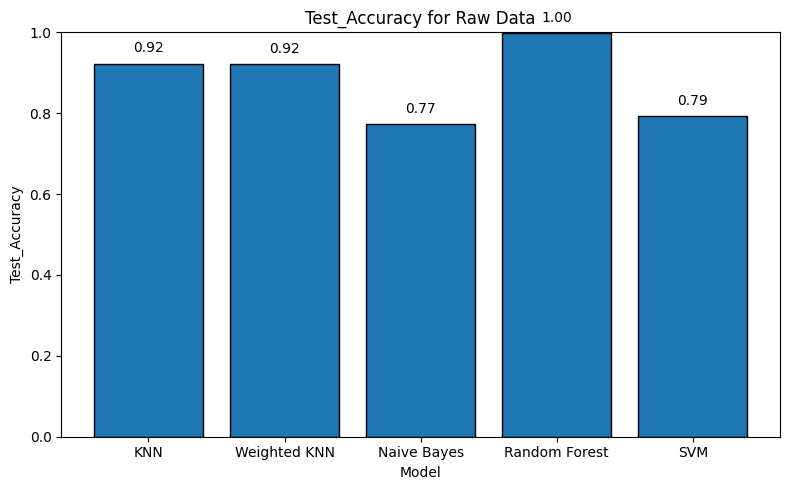

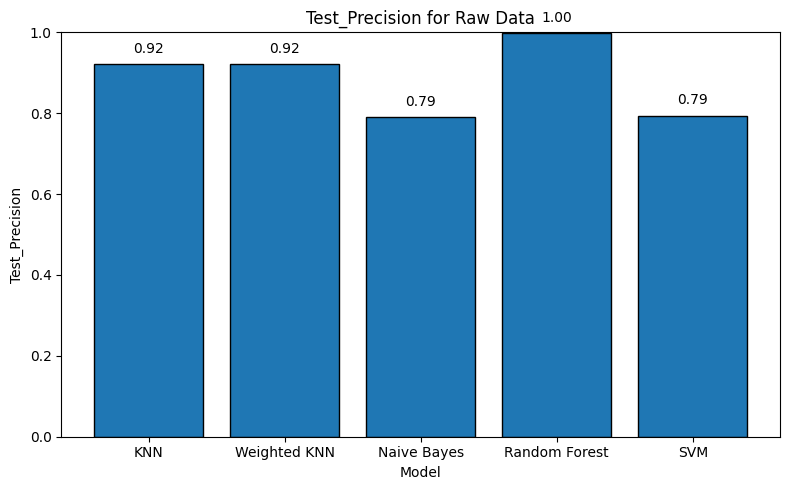

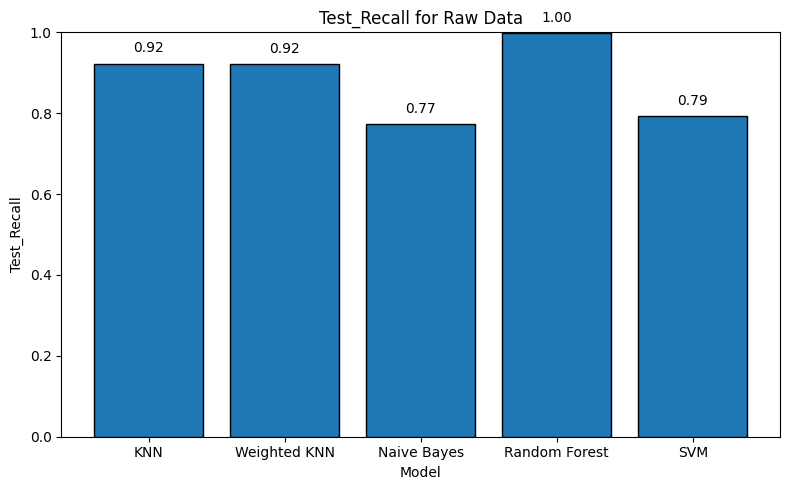

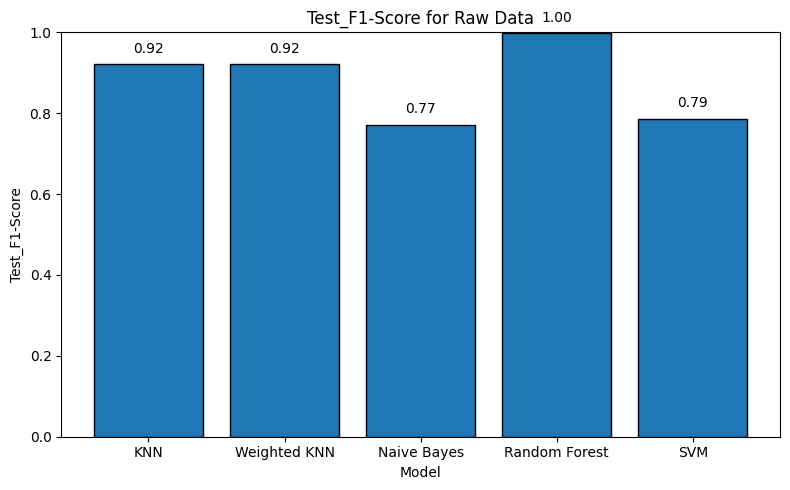

=== Test Metrics for Scaled Data ===


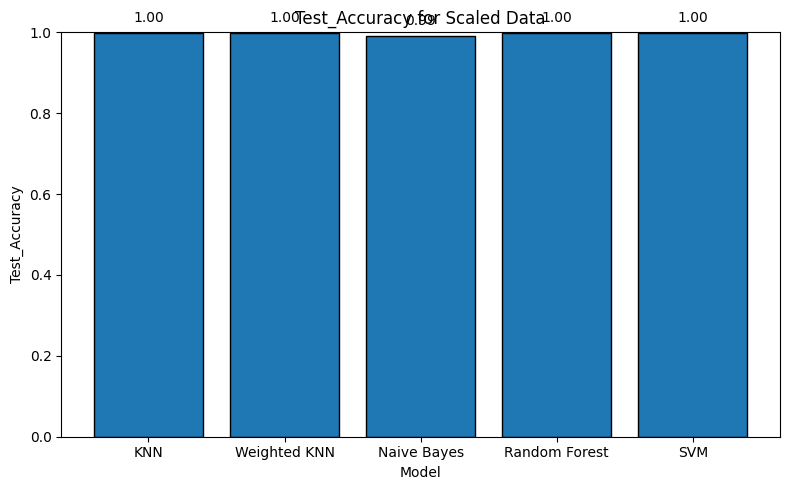

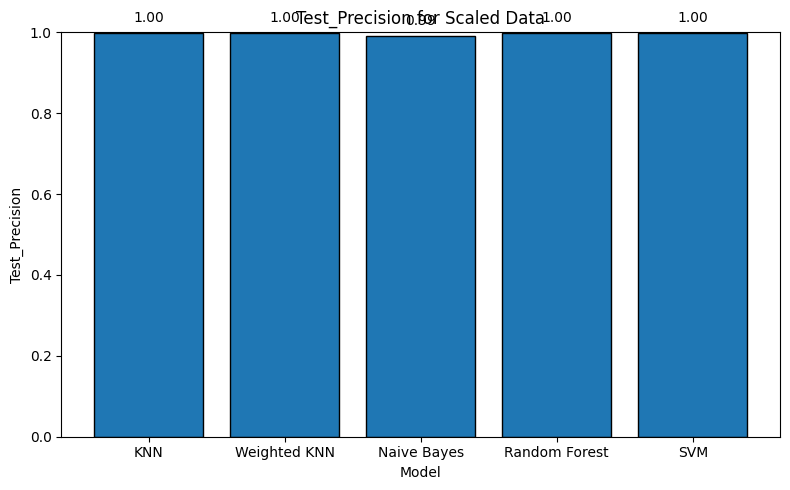

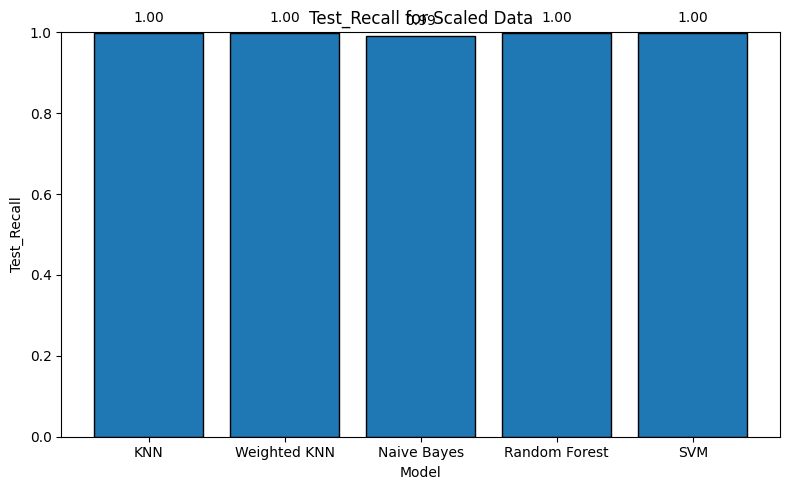

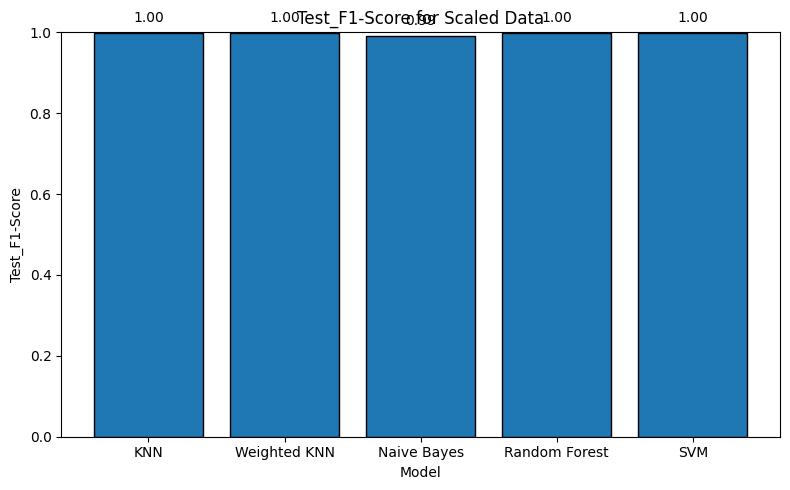


Summary of Model Performance Metrics:
           Model    Data  Test_Accuracy  Test_Precision  Test_Recall  \
0            KNN     Raw       0.922867        0.922333     0.922867   
1            KNN  Scaled       0.997333        0.997341     0.997333   
2   Weighted KNN     Raw       0.922467        0.921996     0.922467   
3   Weighted KNN  Scaled       0.997267        0.997275     0.997267   
4    Naive Bayes     Raw       0.772133        0.790003     0.772133   
5    Naive Bayes  Scaled       0.990067        0.990218     0.990067   
6  Random Forest     Raw       0.998667        0.998667     0.998667   
7  Random Forest  Scaled       0.998667        0.998667     0.998667   
8            SVM     Raw       0.792400        0.794280     0.792400   
9            SVM  Scaled       0.998867        0.998867     0.998867   

   Test_F1-Score  
0       0.922306  
1       0.997335  
2       0.922005  
3       0.997268  
4       0.771918  
5       0.990084  
6       0.998667  
7       0.998667

In [34]:
# Create seperate DataFrames for Raw and Scaled Data
raw_df = summary_df[summary_df['Data'] == 'Raw']
scaled_df = summary_df[summary_df['Data'] == 'Scaled']

# Metrics for reporting:
test_metrics = ['Test_Accuracy', 'Test_Precision', 'Test_Recall', 'Test_F1-Score']


def plot_metric(metric, df, data_type):
    plt.figure(figsize=(8, 5))
    models_list = df['Model'].tolist()
    values = df[metric].tolist()
    plt.bar(models_list, values, edgecolor='black')
    plt.title(f'{metric} for {data_type} Data')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.ylim(0, 1)
    for i, v in enumerate(values):
        plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

# Reporting Test metrics (Raw & Scaled):
print("=== Test Metrics for Raw Data ===")
for metric in test_metrics:
    plot_metric(metric, raw_df, 'Raw')

print("=== Test Metrics for Scaled Data ===")
for metric in test_metrics:
    plot_metric(metric, scaled_df, 'Scaled')


# Printing summary report:
print("\nSummary of Model Performance Metrics:")
print(summary_df)

# Saving resuşts to CSV file:
summary_df.to_csv('model_performance_summary.csv', index=False)
print("\nSummary report saved as 'model_performance_summary.csv'.")

--- Confusion Matrices for Raw Data ---


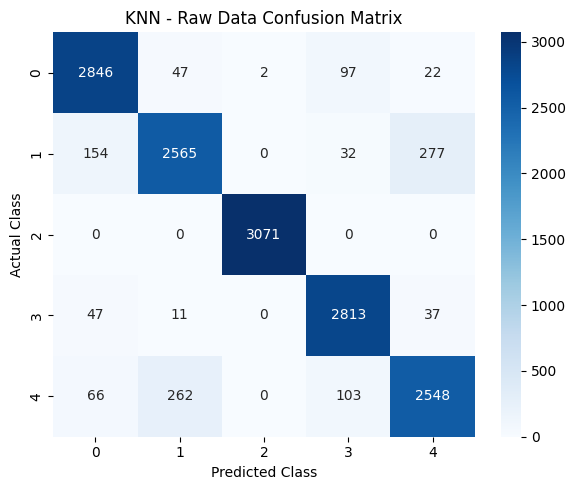

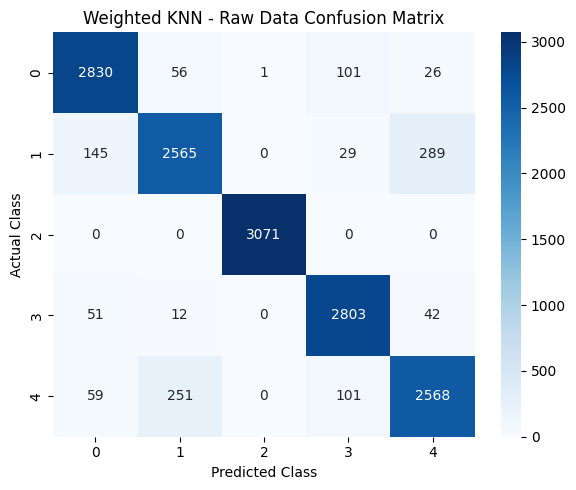

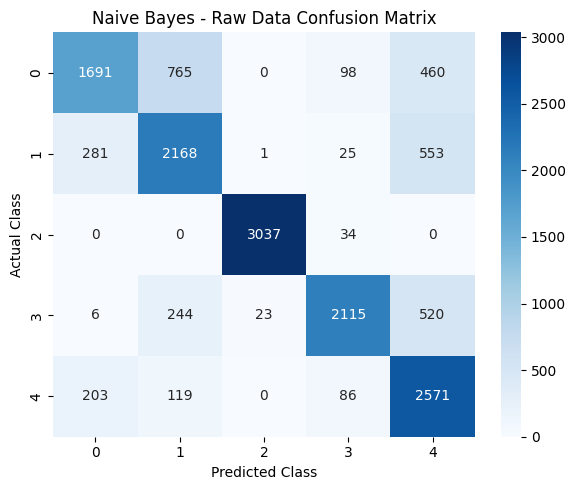

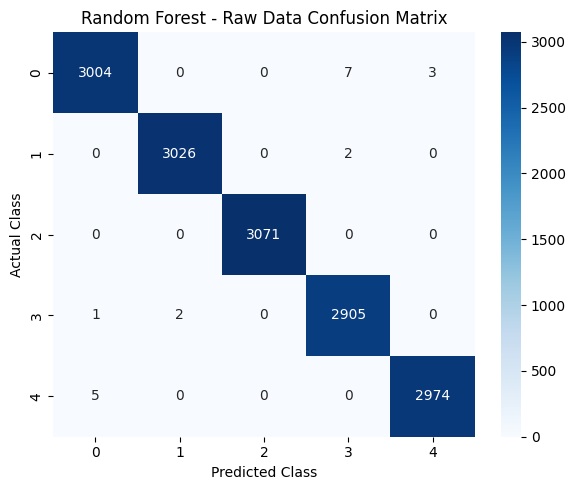

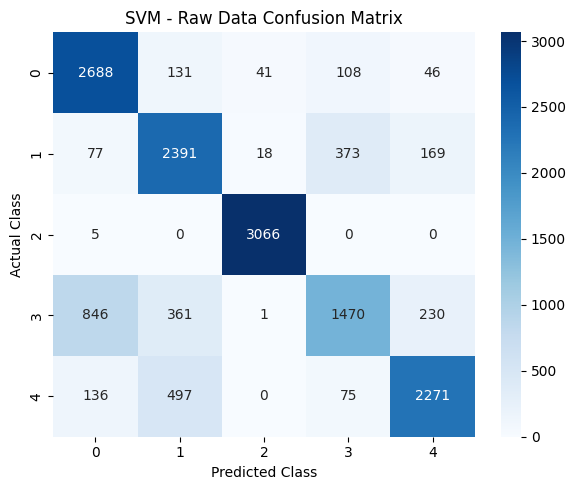

--- Confusion Matrices for Scaled Data ---


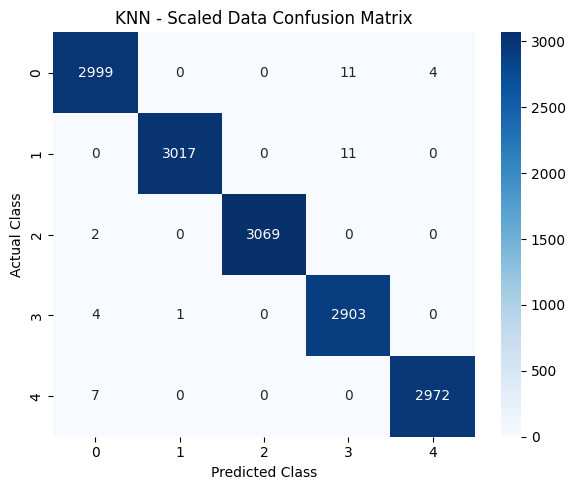

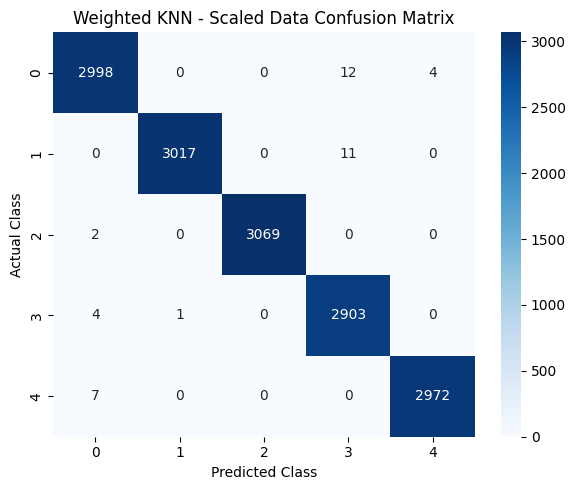

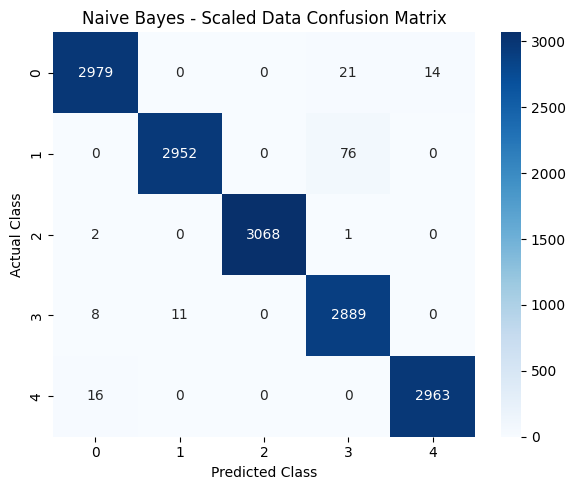

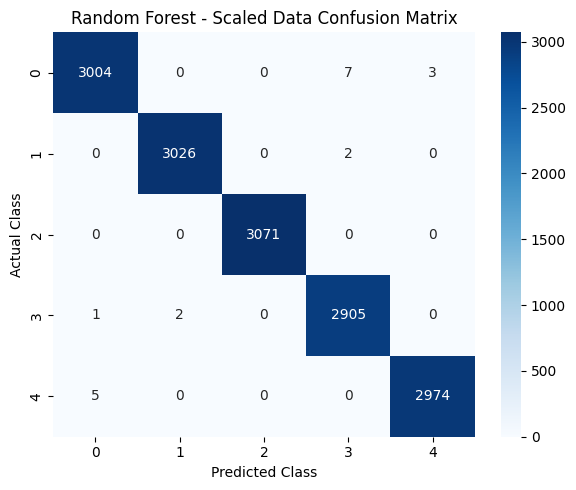

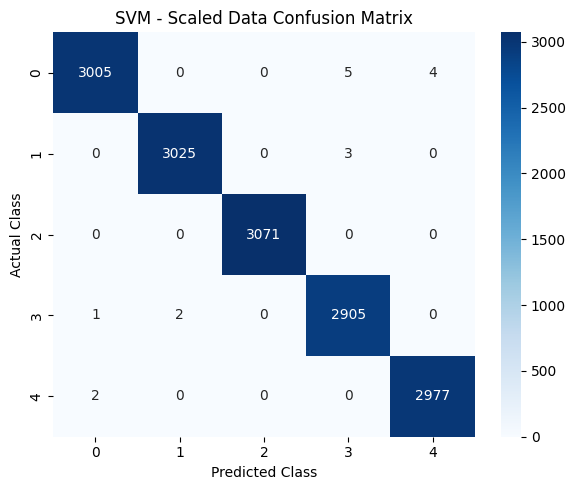

In [35]:
# PART 1: Confusion Matrix Visualization

def plot_confusion_matrix(model, X_test, y_test, title="Confusion Matrix"):
    """
    Generates and visualizes the confusion matrix using predictions from the given model on the test data.
    """
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.tight_layout()
    plt.show()

# Dictionary containing the models used in PART 1 (assumes knn, weighted_knn, nb, rf, and svm are defined)
models = {
    "KNN": knn,
    "Weighted KNN": weighted_knn,
    "Naive Bayes": nb,
    "Random Forest": rf,
    "SVM": svm
}

# Loop over both raw and scaled datasets and generate confusion matrices for each model
for data_type, (X_test_data, X_train_data) in zip(
    ["Raw", "Scaled"],
    [(X_test_raw, X_train_raw), (X_test_scaled, X_train_scaled)]
):
    print(f"--- Confusion Matrices for {data_type} Data ---")
    for name, model in models.items():
        # Re-fit the model using the corresponding training dataset
        model.fit(X_train_data, y_train)
        # Plot the confusion matrix using the corresponding test dataset
        plot_confusion_matrix(
            model, 
            X_test_data, 
            y_test, 
            title=f"{name} - {data_type} Data Confusion Matrix"
        )


## General Comments on Model Performance Results

- **KNN and Weighted KNN** models performed well with raw data but showed remarkable improvement after scaling, confirming the sensitivity to feature normalization.
- **Naive Bayes** achieved significantly better accuracy with scaled data, aligning with theoretical expectations due to improved feature distributions.
- **Random Forest** consistently demonstrated high accuracy regardless of data scaling, highlighting its robustness and stability.
- **SVM** exhibited substantial accuracy improvement after scaling, emphasizing the importance of feature scaling for optimal hyperplane positioning.

Overall, Random Forest and scaled SVM performed best across all metrics, indicating their suitability for this dataset. Scaling is crucial for algorithms that depend on distance metrics and optimization of decision boundaries.
---

## Analysis of Results

- **Random Forest** consistently showed exceptional performance regardless of scaling, verifying its robustness against data variations.
- **KNN, Weighted KNN, and SVM** significantly improved performance with scaling, confirming their sensitivity to feature normalization.
- **Naive Bayes** improved notably with scaled data due to better adherence to its statistical assumptions.

**Conclusion:** The experiments confirm that scaling substantially enhances performance for distance-based methods (KNN, Weighted KNN) and margin-based methods (SVM), while Random Forest remains stable, demonstrating its robustness against data scale variations.

---

# PART2 #

In this part, we have the image forms of the data in the first part. We will extract the features from the images so as to do classification.

In [36]:
# Main directory and class (rice type) information
base_path = "data/part_ii/"
#rice_types = ["Arborio", "Basmati", "Ipsala", "Jasmine", "Karacadag"]
rice_types = ["Arborio", "Basmati", "Ipsala", "Jasmine", "Karacadag"]

In [37]:
# List to store features
features = []


 We write a function that extracts three types of texture-based features from a grayscale image to improve classification performance:
-  Local Binary Pattern (LBP) Histogram → Captures texture patterns. Robust to illumination changes.
- Edge Density using Canny Edge Detection → Measures the proportion of edges in the image. Helps identify sharp structurel differences.
- Haralick Texture Features → Extracts statistical texture properties. Captures higher-order texture details.

In [38]:
# Function to extract additional features: LBP, Edge Density, Haralick
def extract_additional_features(img_gray):
    """
    Extracts additional features from a grayscale image:
    - Local Binary Pattern (LBP) histogram (texture information)
    - Edge density using Canny edge detection
    - Haralick texture features
    """
    # *IMPORTANT:* Convert data type to uint8
    img_gray_uint8 = (img_gray * 255).astype(np.uint8)

    # LBP parameters
    radius = 3
    n_points = 8 * radius
    lbp = local_binary_pattern(img_gray_uint8, n_points, radius, method="uniform")

    # LBP histogram: The number of possible patterns for uniform LBP is n_points + 2.
    bins = np.arange(0, n_points + 3)
    lbp_hist, _ = np.histogram(lbp.ravel(), bins=bins, range=(0, n_points + 2))
    lbp_hist = lbp_hist.astype("float")
    lbp_hist /= (lbp_hist.sum() + 1e-6)  # Normalization

    # *Compute edge density using Canny edge detection*
    edges = cv2.Canny(img_gray_uint8, threshold1=100, threshold2=200)
    edge_density = np.sum(edges > 0) / (img_gray.shape[0] * img_gray.shape[1])

    # *Haralick texture features (mean of 13 features)*
    haralick_features = mahotas.features.haralick(img_gray_uint8).mean(axis=0)

    # *Combine all extracted features into a single vector*
    additional_features = list(lbp_hist) + [edge_density] + list(haralick_features)
    return additional_features


- We need to extract various features from rice grain images, including color, shape, texture, and statistical features, and store them for classification.
- We iterate through rice species folders, processes images, and extract meaningful numerical representations:

In [39]:
for rice_type in rice_types:
    file_pattern = os.path.join(base_path, rice_type, f"{rice_type}_*.jpg")
    files = glob.glob(file_pattern)
    
    print(f"{rice_type} folder contains {len(files)} images.")
    
    if len(files) == 0:
        print(f"Warning: No images found for {rice_type}!")
        continue
    
    for path in files:
        try:
            # Load and normalize the image (resize to 250x250)
            img = io.imread(path)
            img = cv2.resize(img, (250, 250))
            
             # Convert to different color spaces
            img_gray = rgb2gray(img)  # Gri tonlamalı
            img_hsv = rgb2hsv(img)    # HSV renk uzayı
            
            # **Color Features**
            mean_r, mean_g, mean_b = np.mean(img, axis=(0, 1))
            std_r, std_g, std_b = np.std(img, axis=(0, 1))
            mean_h, mean_s, mean_v = np.mean(img_hsv, axis=(0, 1))
            std_h, std_s, std_v = np.std(img_hsv, axis=(0, 1))
            
            # **Histogram Features** (grayscale histogram, 10 bins)
            hist_gray, _ = np.histogram(img_gray, bins=10, range=(0, 1))
            hist_gray = hist_gray / np.sum(hist_gray) if np.sum(hist_gray) != 0 else hist_gray
            
            # **Contour Analysis with Binary Thresholding**
            _, binary = cv2.threshold((img_gray * 255).astype(np.uint8), 128, 255, cv2.THRESH_BINARY_INV)
            contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            
            # Shape features based on contours
            if contours:
                largest_contour = max(contours, key=cv2.contourArea)
                area = cv2.contourArea(largest_contour)
                perimeter = cv2.arcLength(largest_contour, True)
                x, y, w, h = cv2.boundingRect(largest_contour)
                aspect_ratio = w / float(h)
                circularity = 4 * np.pi * area / (perimeter ** 2) if perimeter > 0 else 0
                solidity = area / cv2.contourArea(cv2.convexHull(largest_contour))
                eccentricity = measure.regionprops(measure.label(binary))[0].eccentricity
            else:
                area, perimeter, aspect_ratio, circularity, solidity, eccentricity = 0, 0, 0, 0, 0, 0
            
            # **Additional Features**: LBP, edge density, Haralick texture features
            additional_features = extract_additional_features(img_gray)
            
            # Combine all features (first original features, then histogram, then additional features)
            base_feature_vector = [
                mean_r, mean_g, mean_b, std_r, std_g, std_b,
                mean_h, mean_s, mean_v, std_h, std_s, std_v,
                area, perimeter, aspect_ratio, circularity, solidity, eccentricity
            ]
            base_feature_vector += list(hist_gray)
            base_feature_vector += additional_features
            
            # Save the feature vector along with file path and class label
            features.append([path] + base_feature_vector + [rice_type])
        
        except Exception as e:
            print(f"Error: {path} could not be processed! {str(e)}")

if len(features) == 0:
    raise ValueError("No images were processed! Please check the dataset.")

Arborio folder contains 15000 images.
Basmati folder contains 15000 images.
Ipsala folder contains 15000 images.
Jasmine folder contains 15000 images.
Karacadag folder contains 15000 images.


Since we need to store the features in a structured format, we need to adjust the columns, column names. This ensures each image is represented numerically for classification.

In [40]:
# Define column names (matching the order of feature extraction)
column_names = ["Filename"]
base_columns = ["Mean_R", "Mean_G", "Mean_B", "Std_R", "Std_G", "Std_B",
                "Mean_H", "Mean_S", "Mean_V", "Std_H", "Std_S", "Std_V",
                "Area", "Perimeter", "Aspect_Ratio", "Circularity", "Solidity", "Eccentricity"]
hist_columns = [f"Hist_{i}" for i in range(10)]
lbp_columns = [f"LBP_{i}" for i in range(26)]  # n_points=8*3=24 → 26 features
edge_column = ["Edge_Density"]
haralick_columns = [f"Haralick_{i}" for i in range(13)]
additional_columns = lbp_columns + edge_column + haralick_columns
class_column = ["Class"]

columns = column_names + base_columns + hist_columns + additional_columns + class_column


From here, we do the same processes as part 1:

In [41]:
# Create DataFrame and save to CSV
df_features = pd.DataFrame(features, columns=columns)
df_features.to_csv("image_features.csv", index=False)
print("Feature extraction completed, 'image_features.csv' file created.")

Feature extraction completed, 'image_features.csv' file created.


---
- In this section, we try to understand the data we have with the help of visuals and graphs. 
- We examine 5 sample visuals from each type of rice and draw graphs according to the types.

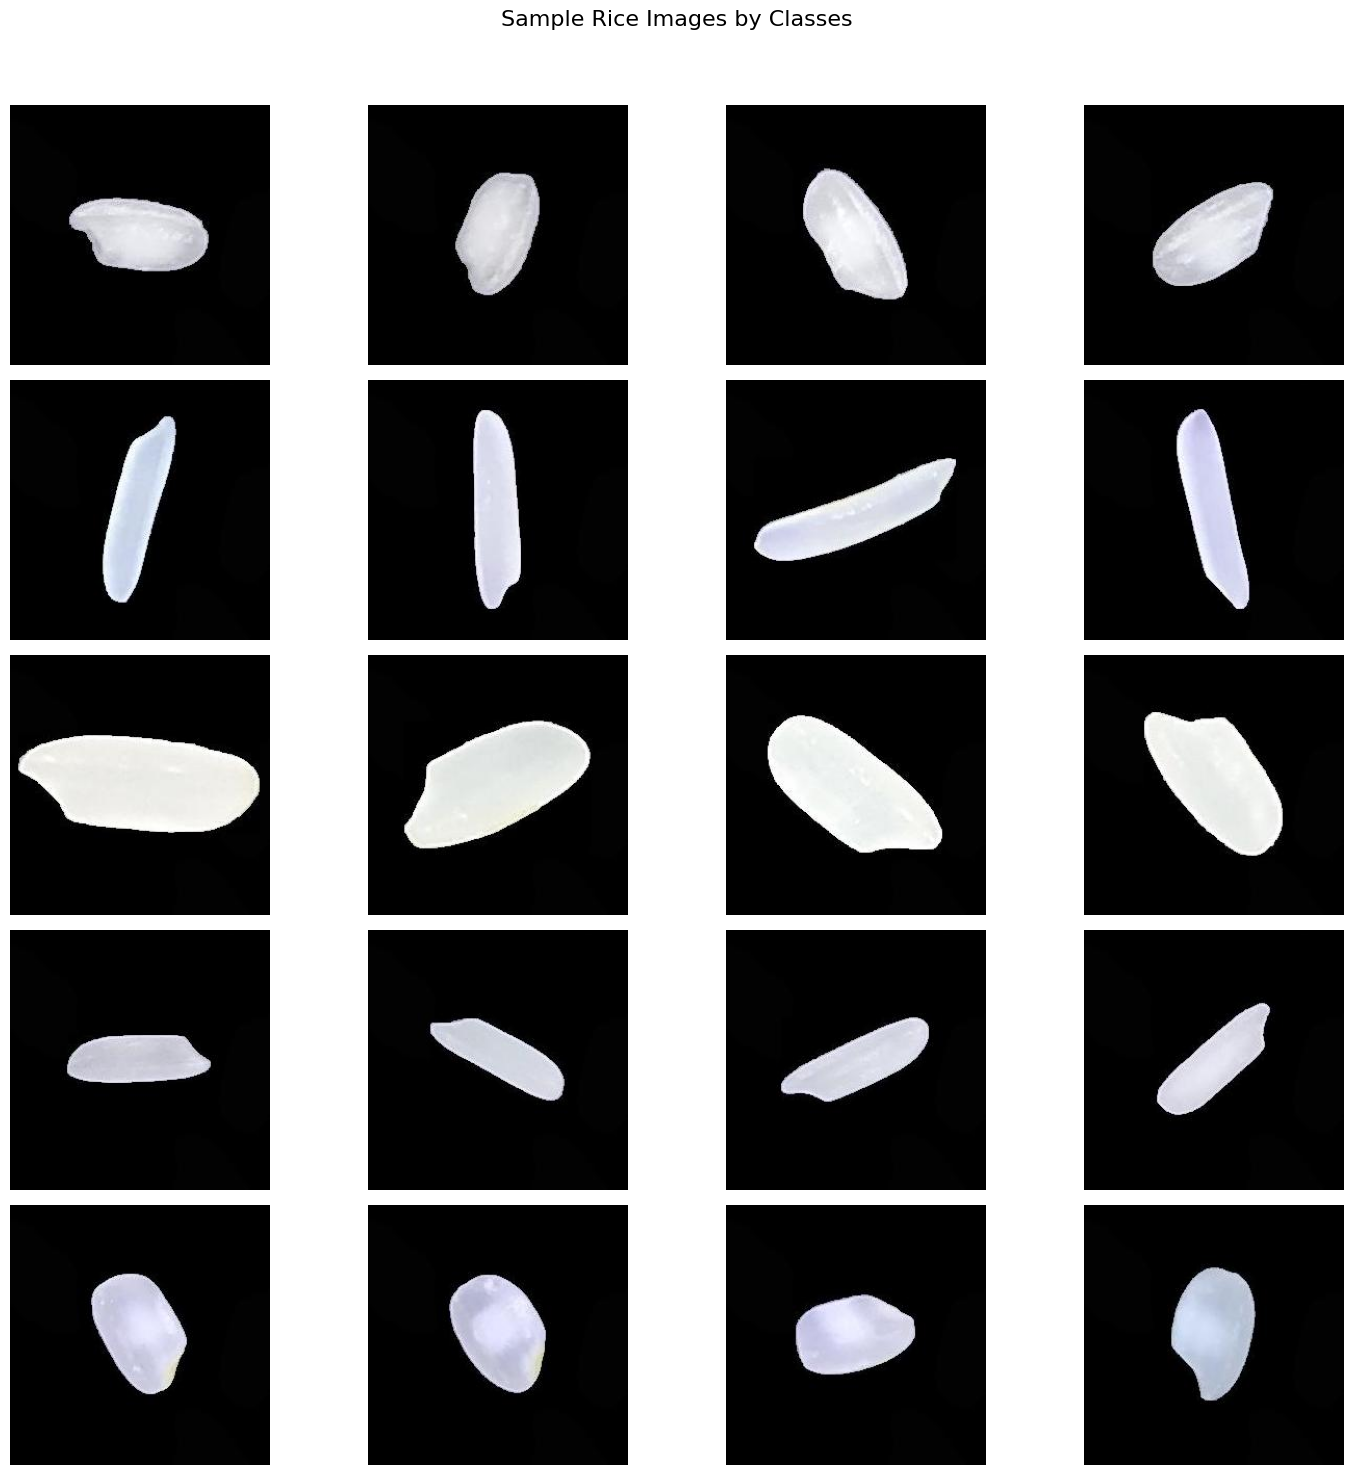

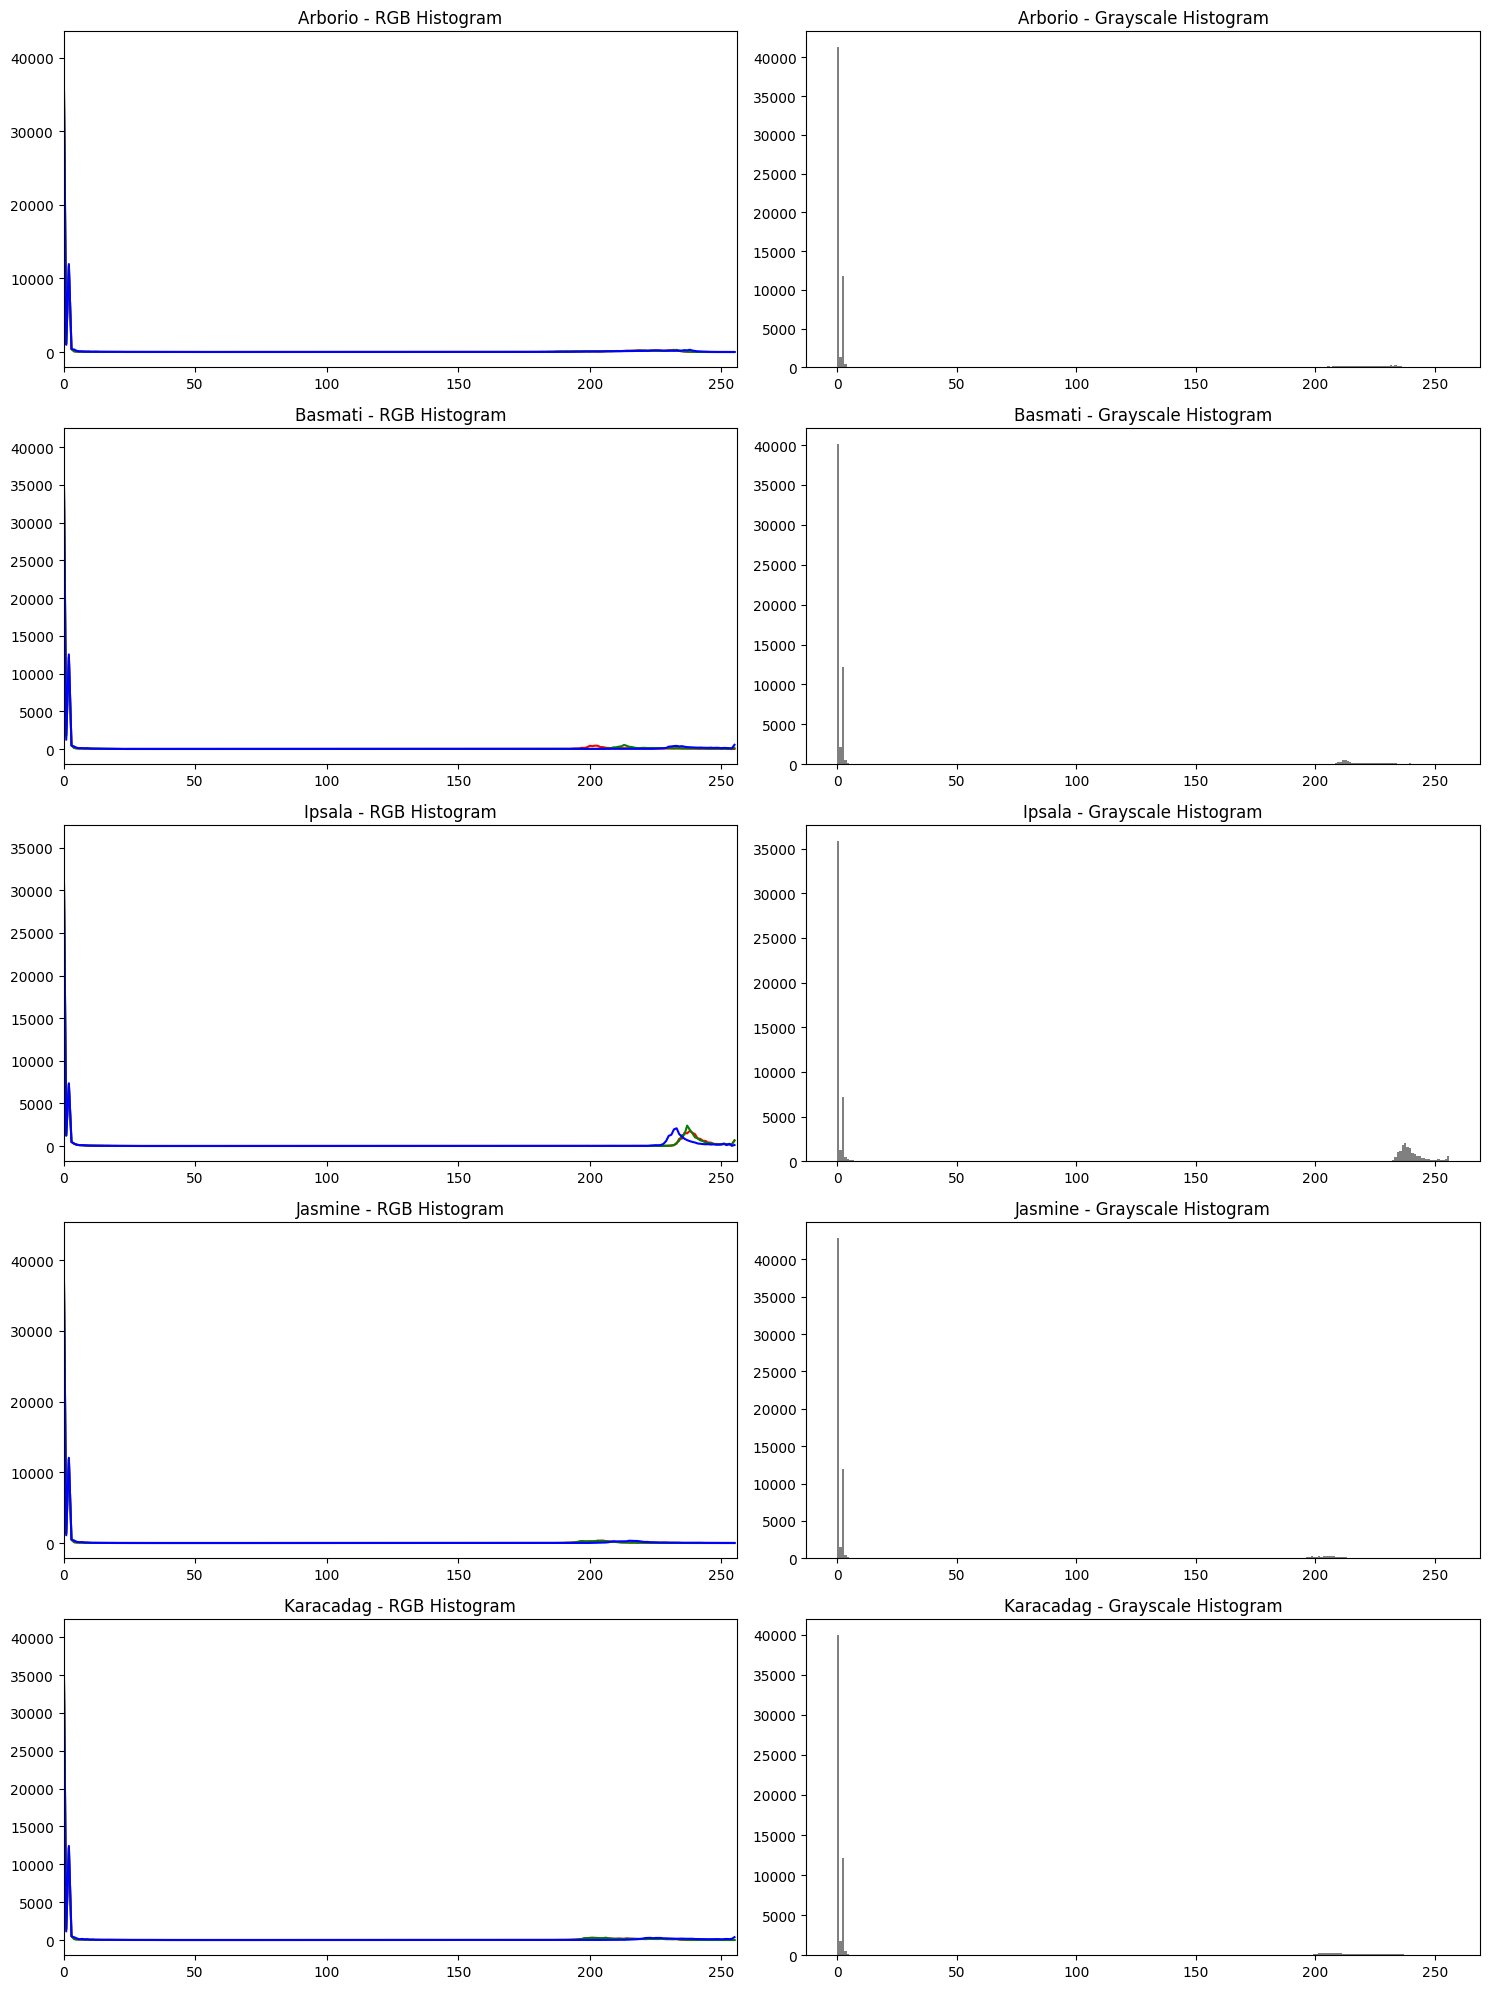

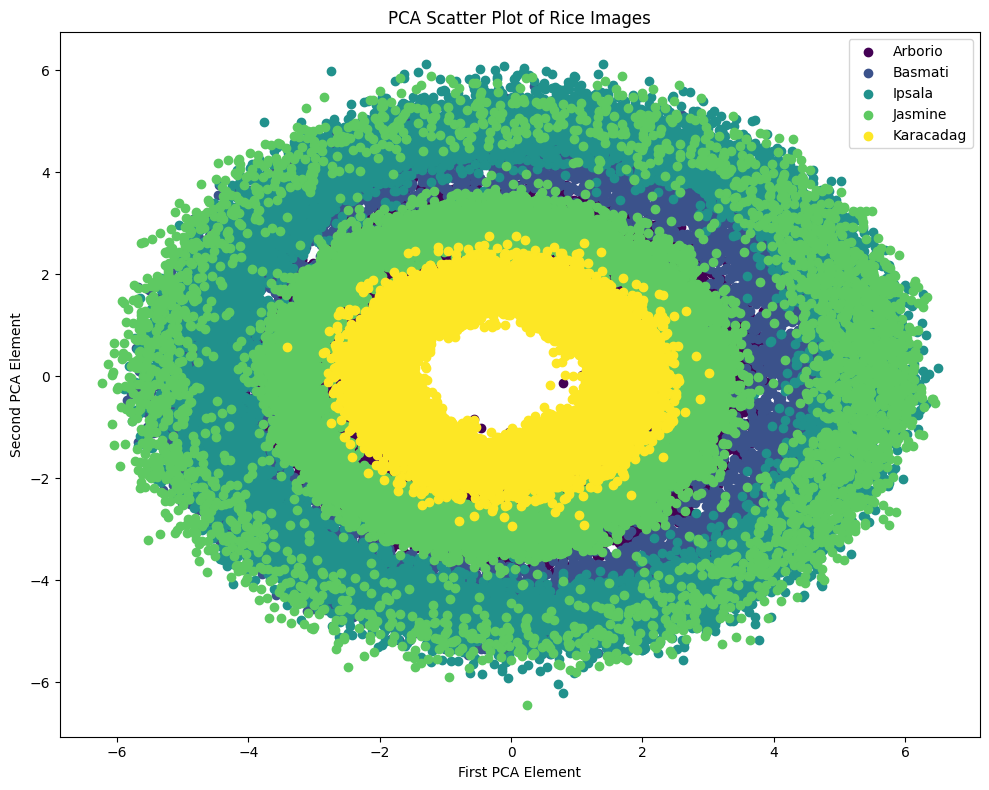

In [67]:
# Data Visualization 

num_samples = 4
plt.figure(figsize=(15, len(rice_types)*3))
for i, rice_type in enumerate(rice_types):
    file_pattern = os.path.join(base_path, rice_type, f"{rice_type}_*.jpg")
    files = glob.glob(file_pattern)
    samples = files[:num_samples] 
    for j, file in enumerate(samples):
        img = cv2.imread(file)
        if img is None:
            continue
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(len(rice_types), num_samples, i*num_samples + j + 1)
        plt.imshow(img_rgb)
        plt.axis("off")
        if j == 0:
            plt.ylabel(rice_type, fontsize=12)
plt.suptitle("Sample Rice Images by Classes", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# --- 2. RGB and Grayscale Histograms ---
plt.figure(figsize=(15, len(rice_types)*4))
for i, rice_type in enumerate(rice_types):
    file_pattern = os.path.join(base_path, rice_type, f"{rice_type}_*.jpg")
    files = glob.glob(file_pattern)
    if len(files) == 0:
        continue
    sample_file = files[0]
    img = cv2.imread(sample_file)
    if img is None:
        continue
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # RGB histograms
    plt.subplot(len(rice_types), 2, 2*i+1)
    colors = ('r', 'g', 'b')
    for j, col in enumerate(colors):
        hist = cv2.calcHist([img_rgb], [j], None, [256], [0, 256])
        plt.plot(hist, color=col)
        plt.xlim([0, 256])
    plt.title(f"{rice_type} - RGB Histogram")
    
    # Grayscale  histograms
    plt.subplot(len(rice_types), 2, 2*i+2)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.hist(img_gray.ravel(), bins=256, range=[0, 256], color='gray')
    plt.title(f"{rice_type} - Grayscale Histogram")
plt.tight_layout()
plt.show()

# --- 3. PCA Scatter Plot (32x32 grayscale images) ---
features_list = []
labels_list = []
for rice_type in rice_types:
    file_pattern = os.path.join(base_path, rice_type, f"{rice_type}_*.jpg")
    files = glob.glob(file_pattern)
    for file in files:
        img = cv2.imread(file)
        if img is None:
            continue
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_gray = rgb2gray(img_rgb)
        img_resized = cv2.resize(img_gray, (32, 32))
        features_list.append(img_resized.flatten())
        labels_list.append(rice_type)
features_array = np.array(features_list)
labels_array = np.array(labels_list)

pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_array)

plt.figure(figsize=(10, 8))
unique_labels = np.unique(labels_array)
cmap = plt.get_cmap("viridis", len(unique_labels))
for i, lab in enumerate(unique_labels):
    idx = labels_array == lab
    plt.scatter(features_pca[idx, 0], features_pca[idx, 1], label=lab, color=cmap(i))
plt.xlabel("First PCA Element")
plt.ylabel("Second PCA Element")
plt.title("PCA Scatter Plot of Rice Images")
plt.legend()
plt.tight_layout()
plt.show()




- **Example Rice Images:**  
  These images display the visual diversity among the different rice types in the dataset.

- **RGB Histograms:**  
  RGB histograms show similar color distributions across rice types, with a concentration in lower intensity values.

- **Grayscale Histograms:**  
  Grayscale histograms indicate that most images are dominated by darker tones, suggesting limited brightness variation.

- **PCA Scatter Plot:**  
  The PCA plot reveals distinct clusters for some rice types, although some overlap exists, hinting at the need for additional features.
---


We calculate the correlation matrix and visualize it using heatmap. Correlation coefficients ranges from -1 to 1. 1 means perfect positive correlation(if one variable increases, other variable increases aas well). -1 means the exact opposite. 0 means there is no correlation between the two variables.

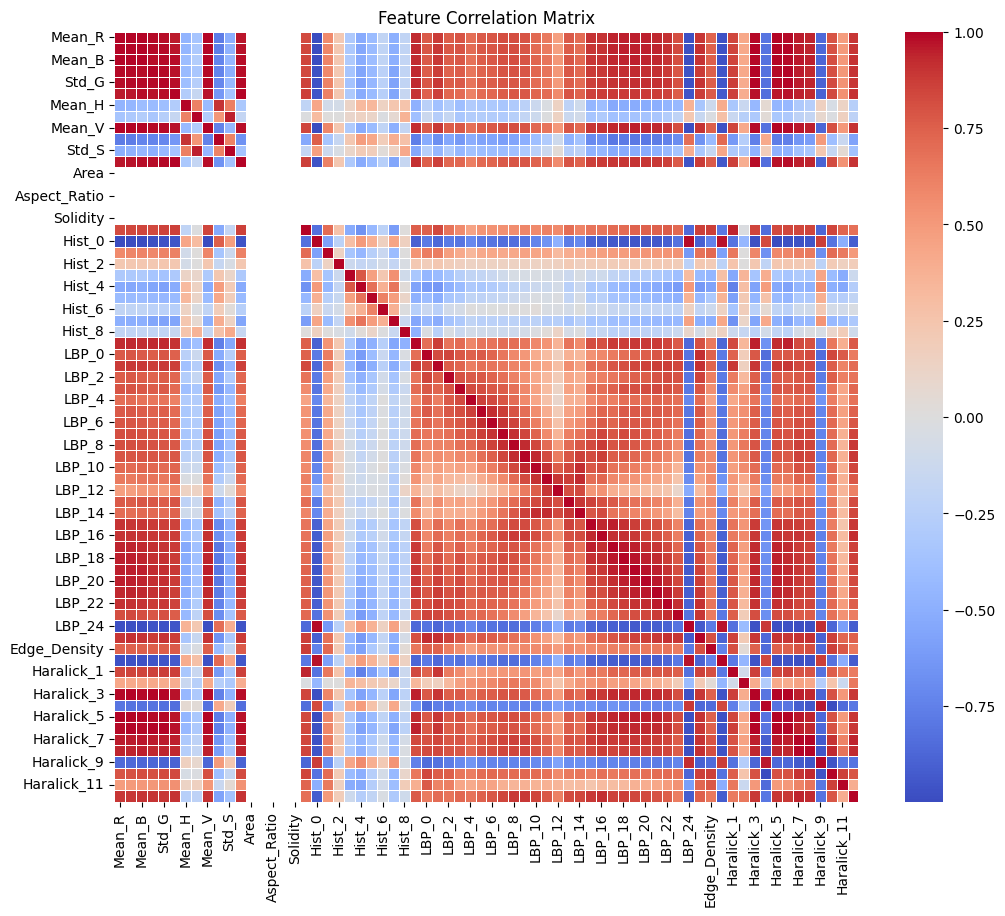


Previous feature count: 70, New feature count: 48

Removed Highly Correlated Features:
['Std_B', 'Haralick_5', 'LBP_22', 'LBP_24', 'Haralick_7', 'LBP_21', 'Haralick_6', 'Std_G', 'Mean_B', 'Haralick_0', 'LBP_18', 'Std_V', 'Haralick_9', 'Std_R', 'Haralick_10', 'Mean_V', 'Haralick_3', 'LBP_20', 'Haralick_8', 'LBP_19', 'Hist_0', 'Mean_G']


In [68]:
# numeric_columns 
numeric_columns = [col for col in df_features.columns if col not in ["Filename", "Class"]]

# creating corelation matrix
correlation_matrix = df_features[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

# removing high corelation features
high_corr_features = set()
corr_threshold = 0.95
for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):
        if abs(correlation_matrix.iloc[i, j]) > corr_threshold:
            high_corr_features.add(correlation_matrix.columns[j])


df_numeric = df_features[numeric_columns].drop(columns=high_corr_features, errors='ignore')


non_numeric_columns = ["Filename", "Class"]

# creating cleaned dataframe
df_cleaned = pd.concat([df_features[non_numeric_columns], df_numeric], axis=1)
print(f"\nPrevious feature count: {df_features.shape[1]}, New feature count: {df_cleaned.shape[1]}")
print("\nRemoved Highly Correlated Features:")
print(list(high_corr_features))



- This correlation matrix indicates that certain features (especially among the LBP and Haralick sets) exhibit strong correlations, suggesting redundancy. Reducing or removing highly correlated features can help simplify the model and potentially improve performance.

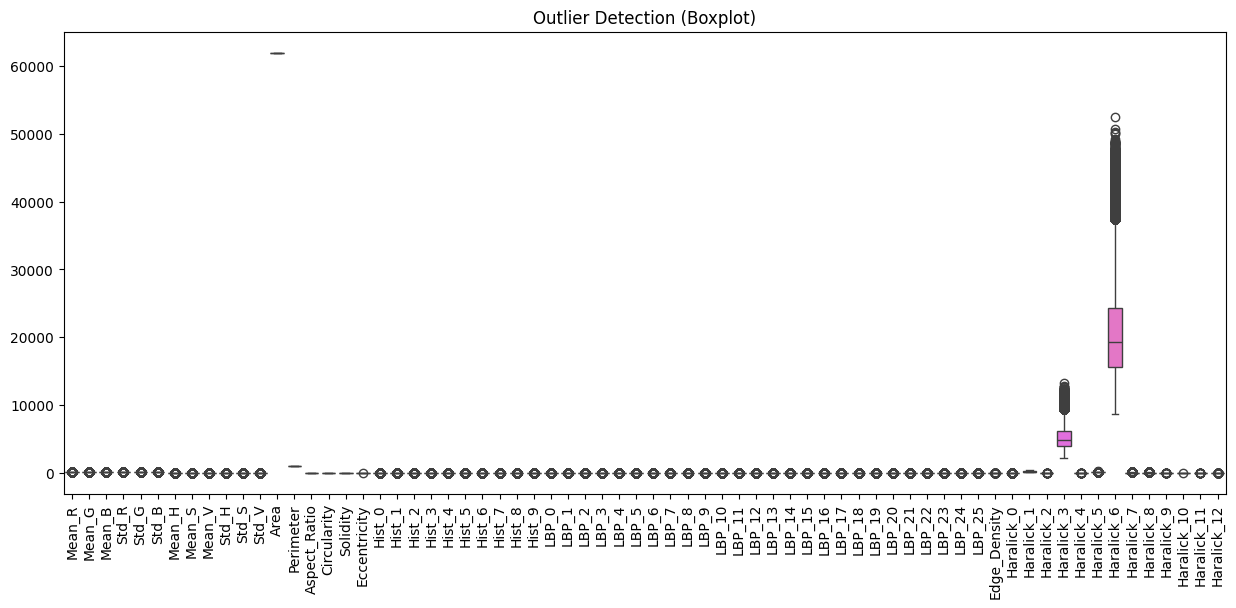

Outliers have been replaced using winsorization (whispering method).


In [69]:
# Outlier Detection, Correlation Matrix, and Feature Cleaning


df = df_features.copy()
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Outlier visualization: Boxplot
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=90)
plt.title("Outlier Detection (Boxplot)")
plt.show()

# Winsorization 
for col in numeric_columns:
    df[col] = winsorize(df[col], limits=(0.05, 0.05))

print("Outliers have been replaced using winsorization (whispering method).")


#

As in Part 1, we limit outliers using the whispering method. Instead of removing or replacing extreme values with column mean, we limit values to a specified range (e.g., 5th and 95th percentiles) using winsorization. 

This approach preserves the overall data distribution while reducing the negative impact of extreme values on model performance.

---


- We have completed the preprocessing phase.
- Now we are separating our data into train and test.
- We also separated it into row and scaled as in Part 1.

In [70]:
# Data Splitting and Scaling


# X: numerical features (excluding Filename and Class)
# y: class labels
X = df_cleaned.drop(columns=["Filename", "Class"])
y = df_cleaned["Class"]



In [71]:
# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Splitting into Train and Test sets completed.")

# Scaing (MinMaxScaler)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Scaling completed.")


Splitting into Train and Test sets completed.
Scaling completed.


---
- We are performing train and test operations with the algorithms we used in Part 1.
- We are performing Cross Validation.
  

In [72]:
# Evaluation Function and Cross-Validation Settings

# 5-Fold Cross Validation settings
k = 5  
kf = KFold(n_splits=k, shuffle=True, random_state=42)

scoring_metrics = {
    "Accuracy": make_scorer(accuracy_score),
    "Precision": make_scorer(precision_score, average='weighted', zero_division=0),
    "Recall": make_scorer(recall_score, average='weighted', zero_division=0),
    "F1-Score": make_scorer(f1_score, average='weighted', zero_division=0)
}

def evaluate_model_cv_all(model, X, y, cv_folds=5):
    # 5-Fold Cross Validation ayarlarını yapıyoruz
    cv = KFold(n_splits=cv_folds, shuffle=True, random_state=42)
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring_metrics)
    
 
    fold_results = []
    n_folds = len(scores['test_Accuracy'])
    for i in range(n_folds):
        fold_results.append({
            metric: scores[f'test_{metric}'][i] for metric in scoring_metrics.keys()
        })
    return fold_results



In [73]:
# KNN Model Evaluation (Raw & Scaled)


# KNN model (n_neighbors=5)
knn = KNeighborsClassifier(n_neighbors=5)

# ---- Raw Data ----
print("KNN - Raw Data Evaluation:")
knn.fit(X_train, y_train)
y_pred_raw = knn.predict(X_test)
raw_metrics_knn = {
    "Accuracy": accuracy_score(y_test, y_pred_raw),
    "Precision": precision_score(y_test, y_pred_raw, average='weighted', zero_division=0),
    "Recall": recall_score(y_test, y_pred_raw, average='weighted', zero_division=0),
    "F1-Score": f1_score(y_test, y_pred_raw, average='weighted', zero_division=0)
}
df_raw_metrics_knn = pd.DataFrame([raw_metrics_knn])
print("Metrics (Raw):")
print(df_raw_metrics_knn.to_string)

knn_cv_results_raw = evaluate_model_cv_all(knn, X_train, y_train)
print("CV Evaluation (Raw) for KNN ")
df_knn_cv_raw = pd.DataFrame(knn_cv_results_raw, index=[f"CV{i}" for i in range(1, len(knn_cv_results_raw)+1)])
print(df_knn_cv_raw.to_string())

# ---- Scaled Data ----
print("\nKNN - Scaled Data Evaluation:")
knn.fit(X_train_scaled, y_train)
y_pred_scaled = knn.predict(X_test_scaled)
scaled_metrics_knn = {
    "Accuracy": accuracy_score(y_test, y_pred_scaled),
    "Precision": precision_score(y_test, y_pred_scaled, average='weighted', zero_division=0),
    "Recall": recall_score(y_test, y_pred_scaled, average='weighted', zero_division=0),
    "F1-Score": f1_score(y_test, y_pred_scaled, average='weighted', zero_division=0)
}
df_scaled_metrics_knn = pd.DataFrame([scaled_metrics_knn])
print("Metrics (Scaled):")
print(df_scaled_metrics_knn.to_string())


knn_cv_results_scaled = evaluate_model_cv_all(knn, X_train_scaled, y_train)
print("CV Evaluation (Scaled) for KNN")
df_knn_cv_scaled = pd.DataFrame(knn_cv_results_scaled, index=[f"CV{i}" for i in range(1, len(knn_cv_results_scaled)+1)])
print(df_knn_cv_scaled.to_string())


KNN - Raw Data Evaluation:
Metrics (Raw):
<bound method DataFrame.to_string of    Accuracy  Precision    Recall  F1-Score
0  0.885933   0.886099  0.885933  0.885805>
CV Evaluation (Raw) for KNN 
     Accuracy  Precision    Recall  F1-Score
CV1  0.884500   0.884498  0.884500  0.884360
CV2  0.892167   0.892312  0.892167  0.892077
CV3  0.884917   0.885192  0.884917  0.884604
CV4  0.884083   0.884062  0.884083  0.883955
CV5  0.883667   0.883782  0.883667  0.883457

KNN - Scaled Data Evaluation:
Metrics (Scaled):
   Accuracy  Precision    Recall  F1-Score
0  0.992533   0.992557  0.992533   0.99253
CV Evaluation (Scaled) for KNN
     Accuracy  Precision    Recall  F1-Score
CV1  0.992333   0.992370  0.992333  0.992331
CV2  0.992083   0.992102  0.992083  0.992080
CV3  0.991417   0.991426  0.991417  0.991409
CV4  0.991417   0.991483  0.991417  0.991421
CV5  0.990333   0.990364  0.990333  0.990331


In [74]:
# Weighted KNN Model Evaluation (Raw & Scaled)


# Weighted KNN model: weights='distance'
weighted_knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

# ---- Raw Data ----
print("Weighted KNN - Raw Data Evaluation:")
weighted_knn.fit(X_train, y_train)
y_pred_raw = weighted_knn.predict(X_test)
raw_metrics_weighted_knn = {
    "Accuracy": accuracy_score(y_test, y_pred_raw),
    "Precision": precision_score(y_test, y_pred_raw, average='weighted', zero_division=0),
    "Recall": recall_score(y_test, y_pred_raw, average='weighted', zero_division=0),
    "F1-Score": f1_score(y_test, y_pred_raw, average='weighted', zero_division=0)
}
df_raw_metrics_wknn = pd.DataFrame([raw_metrics_weighted_knn])
print("Metrics (Raw)")
print(df_raw_metrics_wknn.to_string())


print("CV Evaluation (Raw) for Weighted KNN ")
weighted_knn_cv_results_raw = evaluate_model_cv_all(weighted_knn, X_train, y_train)
df_wknn_cv_raw = pd.DataFrame(weighted_knn_cv_results_raw, index=[f"CV{i}" for i in range(1, len(weighted_knn_cv_results_raw)+1)])
print(df_wknn_cv_raw.to_string())


# ---- Scaled Data ----
print("\nWeighted KNN - Scaled Data Evaluation:")
weighted_knn.fit(X_train_scaled, y_train)
y_pred_scaled = weighted_knn.predict(X_test_scaled)
scaled_metrics_weighted_knn = {
    "Accuracy": accuracy_score(y_test, y_pred_scaled),
    "Precision": precision_score(y_test, y_pred_scaled, average='weighted', zero_division=0),
    "Recall": recall_score(y_test, y_pred_scaled, average='weighted', zero_division=0),
    "F1-Score": f1_score(y_test, y_pred_scaled, average='weighted', zero_division=0)
}
df_scaled_metrics_wknn = pd.DataFrame([scaled_metrics_weighted_knn])
print("Metrics (Scaled)")
print(df_scaled_metrics_wknn.to_string())

print("CV Evaluation (Scaled) for Weighted KNN ")
scaled_knn_cv_results_raw = evaluate_model_cv_all(weighted_knn, X_train, y_train)
df_wknn_cv_scaled = pd.DataFrame(weighted_knn_cv_results_scaled, index=[f"CV{i}" for i in range(1, len(weighted_knn_cv_results_scaled)+1)])
print(df_wknn_cv_scaled.to_string())


Weighted KNN - Raw Data Evaluation:
Metrics (Raw)
   Accuracy  Precision    Recall  F1-Score
0  0.885867   0.886063  0.885867   0.88568
CV Evaluation (Raw) for Weighted KNN 
     Accuracy  Precision    Recall  F1-Score
CV1  0.884417   0.884317  0.884417  0.884173
CV2  0.892167   0.892182  0.892167  0.891950
CV3  0.885750   0.886069  0.885750  0.885393
CV4  0.886667   0.886604  0.886667  0.886456
CV5  0.883833   0.883967  0.883833  0.883663

Weighted KNN - Scaled Data Evaluation:
Metrics (Scaled)
   Accuracy  Precision    Recall  F1-Score
0  0.992533   0.992559  0.992533   0.99253
CV Evaluation (Scaled) for Weighted KNN 
     Accuracy  Precision    Recall  F1-Score
CV1  0.997667   0.997672  0.997667  0.997668
CV2  0.998083   0.998085  0.998083  0.998084
CV3  0.997417   0.997429  0.997417  0.997418
CV4  0.998417   0.998418  0.998417  0.998417
CV5  0.997167   0.997171  0.997167  0.997168


In [75]:
# Naive Bayes Model Evaluation (Raw & Scaled)


# Naive Bayes model
nb = GaussianNB()

# ---- Raw Data ----
print("Naive Bayes - Raw Data Evaluation:")
nb.fit(X_train, y_train)
y_pred_raw = nb.predict(X_test)
raw_metrics_nb = {
    "Accuracy": accuracy_score(y_test, y_pred_raw),
    "Precision": precision_score(y_test, y_pred_raw, average='weighted', zero_division=0),
    "Recall": recall_score(y_test, y_pred_raw, average='weighted', zero_division=0),
    "F1-Score": f1_score(y_test, y_pred_raw, average='weighted', zero_division=0)
}
df_raw_metrics_nb = pd.DataFrame([raw_metrics_nb])
print("Metrics (Raw)")
print(df_raw_metrics_nb.to_string())

#CV
print("CV Evaluation (Raw) for Naive Bayes")
nb_cv_results_raw = evaluate_model_cv_all(nb, X_train, y_train)
df_nb_cv_raw = pd.DataFrame(nb_cv_results_raw, index=[f"CV{i}" for i in range(1, len(nb_cv_results_raw)+1)])
print(df_nb_cv_raw.to_string())


# ---- Scaled Data ----
print("\nNaive Bayes - Scaled Data Evaluation:")
nb.fit(X_train_scaled, y_train)
y_pred_scaled = nb.predict(X_test_scaled)
scaled_metrics_nb = {
    "Accuracy": accuracy_score(y_test, y_pred_scaled),
    "Precision": precision_score(y_test, y_pred_scaled, average='weighted', zero_division=0),
    "Recall": recall_score(y_test, y_pred_scaled, average='weighted', zero_division=0),
    "F1-Score": f1_score(y_test, y_pred_scaled, average='weighted', zero_division=0)
}
df_scaled_metrics_nb = pd.DataFrame([scaled_metrics_nb])
print("Metrics (Scaled)")
print(df_scaled_metrics_nb.to_string())

#CV
print("CV Evaluation (Scaled) for Naive Bayes")
nb_cv_results_scaled = evaluate_model_cv_all(nb, X_train, y_train)
df_nb_cv_scaled = pd.DataFrame(nb_cv_results_scaled, index=[f"CV{i}" for i in range(1, len(nb_cv_results_scaled)+1)])
print(df_nb_cv_scaled.to_string())

Naive Bayes - Raw Data Evaluation:
Metrics (Raw)
   Accuracy  Precision  Recall  F1-Score
0    0.9456   0.946008  0.9456  0.945564
CV Evaluation (Raw) for Naive Bayes
     Accuracy  Precision    Recall  F1-Score
CV1  0.949833   0.950137  0.949833  0.949839
CV2  0.945583   0.945785  0.945583  0.945557
CV3  0.946750   0.947259  0.946750  0.946711
CV4  0.947333   0.947862  0.947333  0.947401
CV5  0.945667   0.946217  0.945667  0.945652

Naive Bayes - Scaled Data Evaluation:
Metrics (Scaled)
   Accuracy  Precision  Recall  F1-Score
0      0.95   0.951801    0.95  0.950039
CV Evaluation (Scaled) for Naive Bayes
     Accuracy  Precision    Recall  F1-Score
CV1  0.949833   0.950137  0.949833  0.949839
CV2  0.945583   0.945785  0.945583  0.945557
CV3  0.946750   0.947259  0.946750  0.946711
CV4  0.947333   0.947862  0.947333  0.947401
CV5  0.945667   0.946217  0.945667  0.945652


In [76]:
# Random Forest Model Evaluation (Raw & Scaled)


# Random Forest model (n_estimators=100, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# ---- Raw Data ----
print("Random Forest - Raw Data Evaluation:")
rf.fit(X_train, y_train)
y_pred_raw = rf.predict(X_test)
raw_metrics_rf = {
    "Accuracy": accuracy_score(y_test, y_pred_raw),
    "Precision": precision_score(y_test, y_pred_raw, average='weighted', zero_division=0),
    "Recall": recall_score(y_test, y_pred_raw, average='weighted', zero_division=0),
    "F1-Score": f1_score(y_test, y_pred_raw, average='weighted', zero_division=0)
}
df_raw_metrics_rf = pd.DataFrame([raw_metrics_rf])
print("Metrics (Raw)")
print(df_raw_metrics_rf.to_string())

#CV
print("CV Evaluation (Raw) for Random Forest ")
rf_cv_results_raw = evaluate_model_cv_all(rf, X_train, y_train)
df_rf_cv_raw = pd.DataFrame(rf_cv_results_raw, index=[f"CV{i}" for i in range(1, len(rf_cv_results_raw)+1)])
print(df_rf_cv_raw.to_string())

# ---- Scaled Data ----
print("\nRandom Forest - Scaled Data Evaluation:")
rf.fit(X_train_scaled, y_train)
y_pred_scaled = rf.predict(X_test_scaled)
scaled_metrics_rf = {
    "Accuracy": accuracy_score(y_test, y_pred_scaled),
    "Precision": precision_score(y_test, y_pred_scaled, average='weighted', zero_division=0),
    "Recall": recall_score(y_test, y_pred_scaled, average='weighted', zero_division=0),
    "F1-Score": f1_score(y_test, y_pred_scaled, average='weighted', zero_division=0)
}
df_scaled_metrics_rf = pd.DataFrame([scaled_metrics_rf])
print("Metrics (Scaled)")
print(df_scaled_metrics_rf.to_string())

#CV
print("CV Evaluation (Scaled) for Random Forest ")
rf_cv_results_scaled = evaluate_model_cv_all(rf, X_train_scaled, y_train)
df_rf_cv_scaled = pd.DataFrame(rf_cv_results_scaled, index=[f"CV{i}" for i in range(1, len(rf_cv_results_scaled)+1)])
print(df_rf_cv_scaled.to_string())


Random Forest - Raw Data Evaluation:
Metrics (Raw)
   Accuracy  Precision  Recall  F1-Score
0    0.9946   0.994605  0.9946    0.9946
CV Evaluation (Raw) for Random Forest 
     Accuracy  Precision    Recall  F1-Score
CV1  0.994750   0.994757  0.994750  0.994753
CV2  0.995750   0.995756  0.995750  0.995751
CV3  0.994667   0.994669  0.994667  0.994666
CV4  0.995250   0.995256  0.995250  0.995251
CV5  0.993583   0.993587  0.993583  0.993583

Random Forest - Scaled Data Evaluation:
Metrics (Scaled)
   Accuracy  Precision    Recall  F1-Score
0  0.994733   0.994738  0.994733  0.994733
CV Evaluation (Scaled) for Random Forest 
     Accuracy  Precision    Recall  F1-Score
CV1  0.994750   0.994757  0.994750  0.994753
CV2  0.995750   0.995756  0.995750  0.995751
CV3  0.994583   0.994584  0.994583  0.994583
CV4  0.995417   0.995422  0.995417  0.995418
CV5  0.993417   0.993420  0.993417  0.993416


In [77]:
# SVM (LinearSVC) Model Evaluation (Raw & Scaled)


# SVM model (LinearSVC, max_iter=10000)
svm = LinearSVC(max_iter=10000)

# ---- Raw Data ----
print("SVM - Raw Data Evaluation:")
svm.fit(X_train, y_train)
y_pred_raw = svm.predict(X_test)
raw_metrics_svm = {
    "Accuracy": accuracy_score(y_test, y_pred_raw),
    "Precision": precision_score(y_test, y_pred_raw, average='weighted', zero_division=0),
    "Recall": recall_score(y_test, y_pred_raw, average='weighted', zero_division=0),
    "F1-Score": f1_score(y_test, y_pred_raw, average='weighted', zero_division=0)
}
df_raw_metrics_svm = pd.DataFrame([raw_metrics_svm])
print("Metrics (Raw)")
print(df_raw_metrics_svm.to_string())

#CV
print("CV Evaluation (Raw) for SVM")
svm_cv_results_raw = evaluate_model_cv_all(svm, X_train, y_train)
df_svm_cv_raw = pd.DataFrame(svm_cv_results_raw, index=[f"CV{i}" for i in range(1, len(svm_cv_results_raw)+1)])
print(df_svm_cv_raw.to_string())

# ---- Scaled Data ----
print("\nSVM - Scaled Data Evaluation:")
svm.fit(X_train_scaled, y_train)
y_pred_scaled = svm.predict(X_test_scaled)
scaled_metrics_svm = {
    "Accuracy": accuracy_score(y_test, y_pred_scaled),
    "Precision": precision_score(y_test, y_pred_scaled, average='weighted', zero_division=0),
    "Recall": recall_score(y_test, y_pred_scaled, average='weighted', zero_division=0),
    "F1-Score": f1_score(y_test, y_pred_scaled, average='weighted', zero_division=0)
}
df_scaled_metrics_svm = pd.DataFrame([scaled_metrics_svm])
print("Metrics (Scaled)")
print(df_scaled_metrics_svm.to_string())

#CV
print("CV Evaluation (Scaled) for SVM ")
svm_cv_results_scaled = evaluate_model_cv_all(svm, X_train_scaled, y_train)
df_svm_cv_scaled = pd.DataFrame(svm_cv_results_scaled, index=[f"CV{i}" for i in range(1, len(svm_cv_results_scaled)+1)])
print(df_svm_cv_scaled.to_string())


SVM - Raw Data Evaluation:
Metrics (Raw)
   Accuracy  Precision    Recall  F1-Score
0  0.820067   0.829649  0.820067  0.812449
CV Evaluation (Raw) for SVM
     Accuracy  Precision    Recall  F1-Score
CV1  0.816333   0.826783  0.816333  0.808582
CV2  0.830167   0.839223  0.830167  0.823118
CV3  0.821167   0.830300  0.821167  0.813601
CV4  0.825083   0.833303  0.825083  0.818053
CV5  0.823333   0.834916  0.823333  0.816591

SVM - Scaled Data Evaluation:
Metrics (Scaled)
   Accuracy  Precision    Recall  F1-Score
0  0.994067    0.99409  0.994067   0.99407
CV Evaluation (Scaled) for SVM 
     Accuracy  Precision    Recall  F1-Score
CV1  0.993500   0.993540  0.993500  0.993508
CV2  0.992667   0.992674  0.992667  0.992668
CV3  0.993000   0.993030  0.993000  0.993003
CV4  0.993417   0.993468  0.993417  0.993427
CV5  0.994000   0.994025  0.994000  0.994005


In [78]:
summary_list = []

# KNN
summary_list.append({"Model": "KNN", "Data": "Raw", **raw_metrics_knn})
summary_list.append({"Model": "KNN", "Data": "Scaled", **scaled_metrics_knn})

# Weighted KNN
summary_list.append({"Model": "Weighted KNN", "Data": "Raw", **raw_metrics_weighted_knn})
summary_list.append({"Model": "Weighted KNN", "Data": "Scaled", **scaled_metrics_weighted_knn})

# Naive Bayes
summary_list.append({"Model": "Naive Bayes", "Data": "Raw", **raw_metrics_nb})
summary_list.append({"Model": "Naive Bayes", "Data": "Scaled", **scaled_metrics_nb})

# Random Forest
summary_list.append({"Model": "Random Forest", "Data": "Raw", **raw_metrics_rf})
summary_list.append({"Model": "Random Forest", "Data": "Scaled", **scaled_metrics_rf})

# SVM
summary_list.append({"Model": "SVM", "Data": "Raw", **raw_metrics_svm})
summary_list.append({"Model": "SVM", "Data": "Scaled", **scaled_metrics_svm})

summary_df = pd.DataFrame(summary_list)
print("General Summary of Results:")
print(summary_df)


# Plot bar charts for each metric
metrics_list = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

def plot_metric(metric, df, data_type):
    plt.figure(figsize=(8, 5))
    model_names = df['Model'].tolist()
    values = df[metric].tolist()
    plt.bar(model_names, values, edgecolor='black')
    plt.title(f'{metric} - {data_type} Data')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.ylim(0, 1)
    for i, v in enumerate(values):
        plt.text(i, v + 0.02, f'{v:.2f}', ha='center')
    plt.tight_layout()
    plt.show()



General Summary of Results:
           Model    Data  Accuracy  Precision    Recall  F1-Score
0            KNN     Raw  0.885933   0.886099  0.885933  0.885805
1            KNN  Scaled  0.992533   0.992557  0.992533  0.992530
2   Weighted KNN     Raw  0.885867   0.886063  0.885867  0.885680
3   Weighted KNN  Scaled  0.992533   0.992559  0.992533  0.992530
4    Naive Bayes     Raw  0.945600   0.946008  0.945600  0.945564
5    Naive Bayes  Scaled  0.950000   0.951801  0.950000  0.950039
6  Random Forest     Raw  0.994600   0.994605  0.994600  0.994600
7  Random Forest  Scaled  0.994733   0.994738  0.994733  0.994733
8            SVM     Raw  0.820067   0.829649  0.820067  0.812449
9            SVM  Scaled  0.994067   0.994090  0.994067  0.994070


=== Raw Data Metrics ===


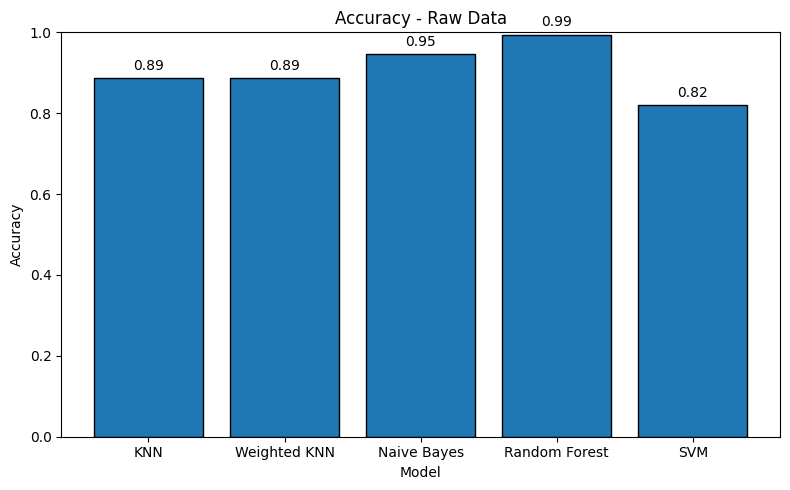

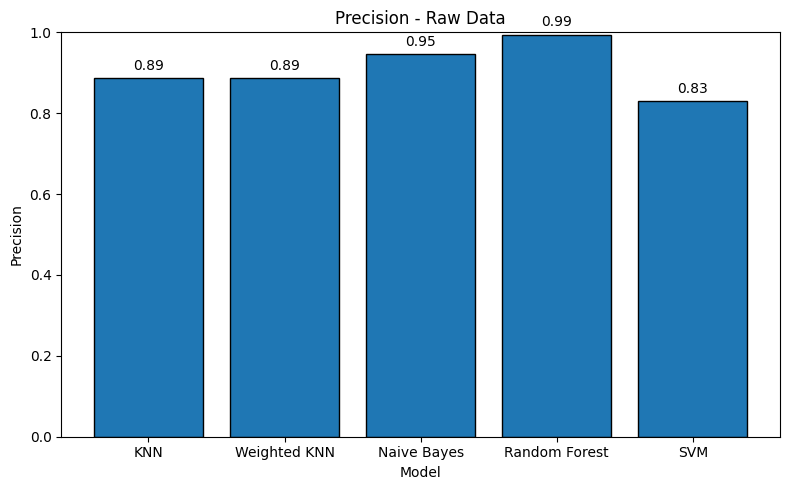

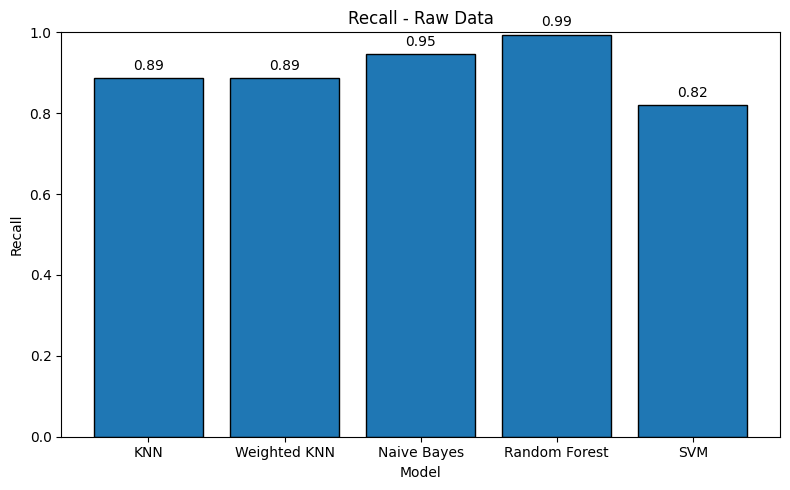

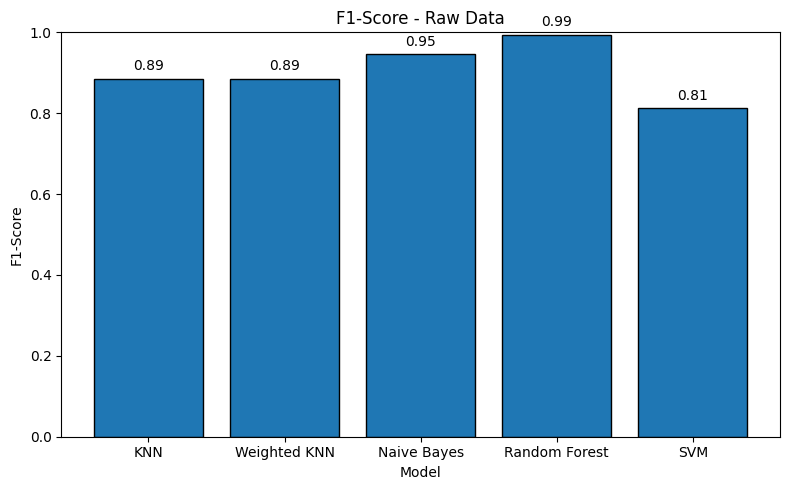

=== Scaled Data Metrics ===


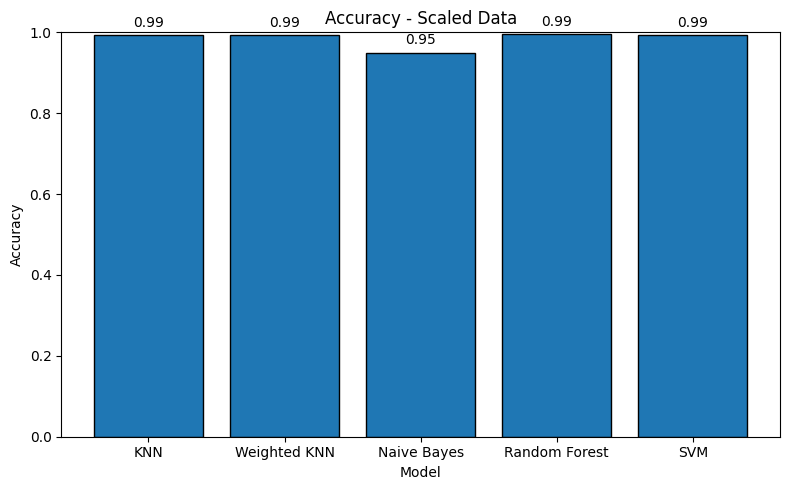

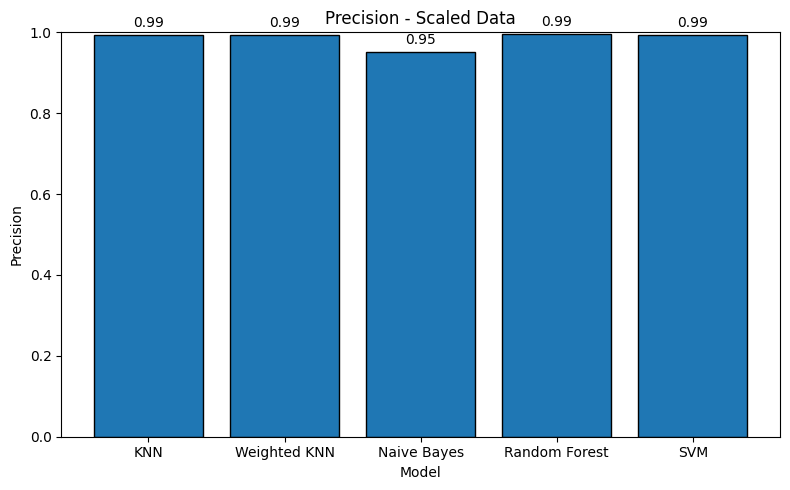

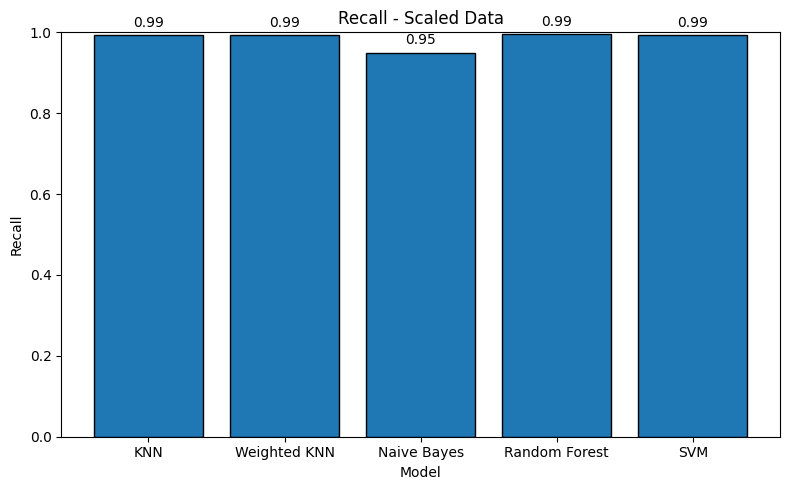

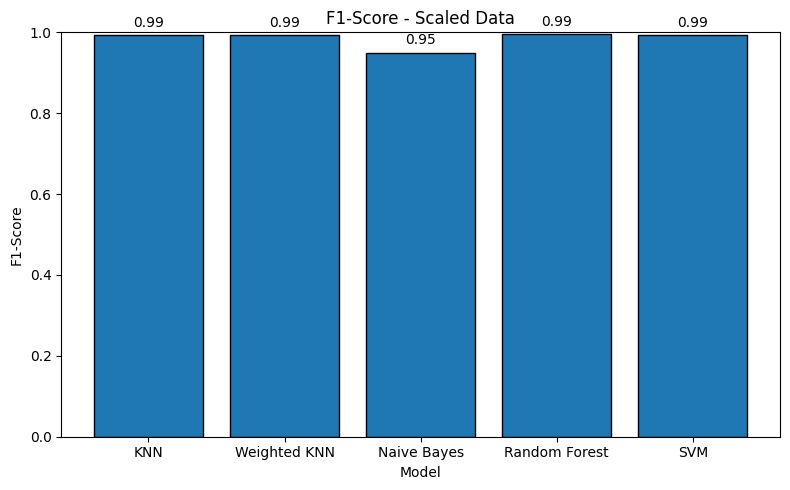

Summary report saved as 'part_II_model_performance_summary.csv'.


In [79]:

# Raw Data charts
print("=== Raw Data Metrics ===")
raw_df = summary_df[summary_df['Data'] == 'Raw']
for metric in metrics_list:
    plot_metric(metric, raw_df, 'Raw')

# Scaled Data charts
print("=== Scaled Data Metrics ===")
scaled_df = summary_df[summary_df['Data'] == 'Scaled']
for metric in metrics_list:
    plot_metric(metric, scaled_df, 'Scaled')

# Save the summary report to a CSV file
summary_df.to_csv("part_II_model_performance_summary.csv", index=False)
print("Summary report saved as 'part_II_model_performance_summary.csv'.")

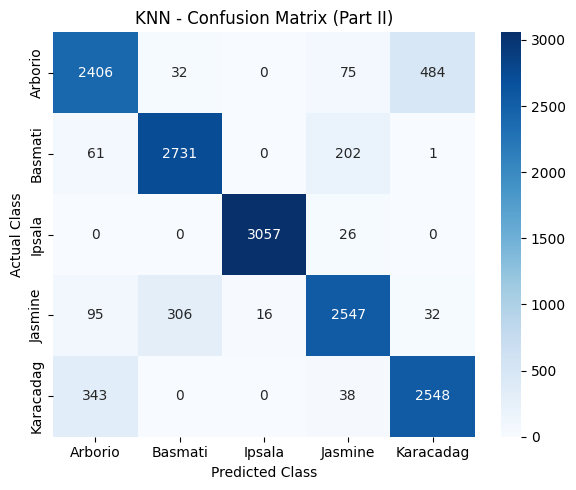


--- PART 2: Confusion Matrices for Various Models ---


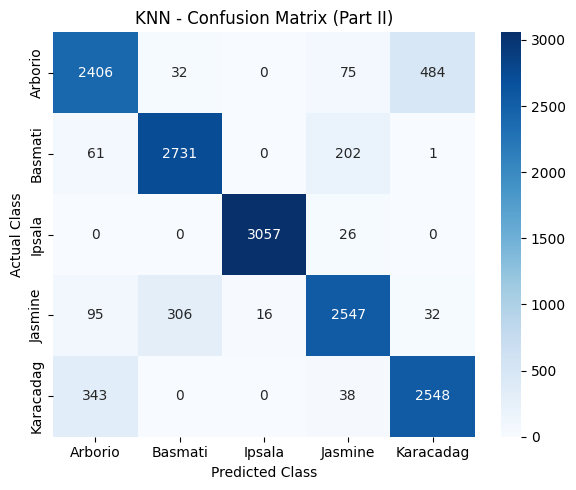

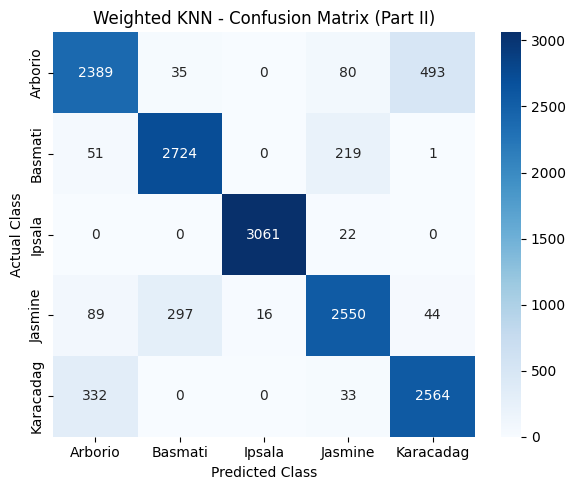

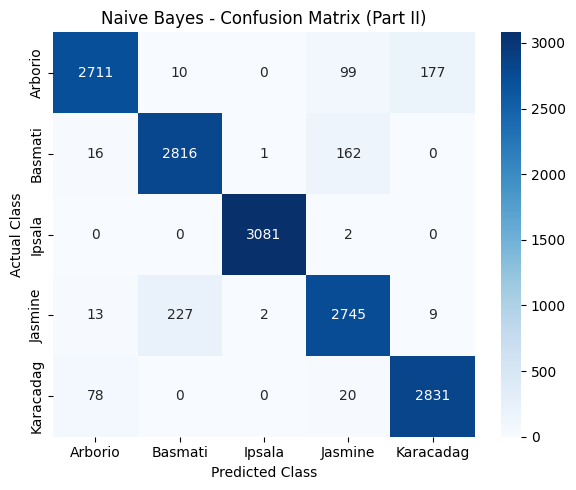

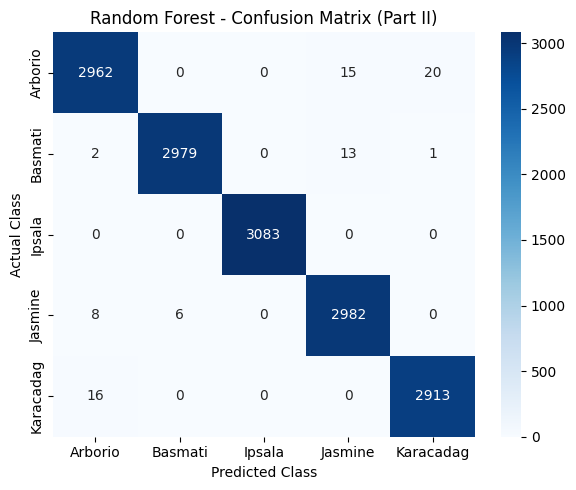

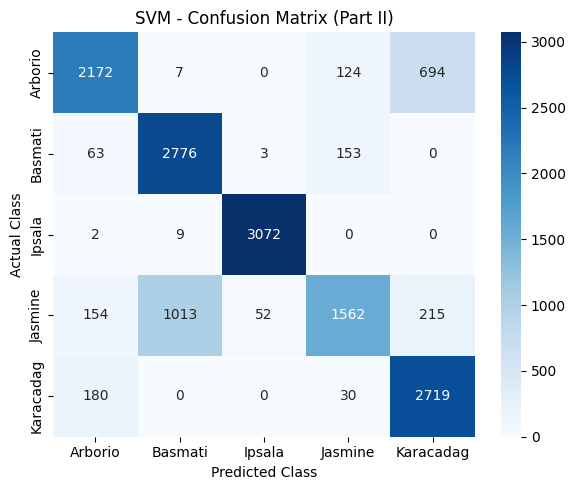

In [80]:
# Confusion Matrix Visualization for Image Data

def plot_confusion_matrix_pm2(model, X_test, y_test, title="Confusion Matrix"):
    """
    Generates and visualizes a confusion matrix using predictions from the given model on test data.
    The axis labels are in English.
    """
    y_pred = model.predict(X_test)
    # Use the unique classes from y_test as labels
    labels = np.unique(y_test)
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.tight_layout()
    plt.show()

# Generate and plot a confusion matrix using a KNN model on PART 2 data
knn_pm2 = KNeighborsClassifier(n_neighbors=5)
knn_pm2.fit(X_train, y_train)
plot_confusion_matrix_pm2(knn_pm2, X_test, y_test, title="KNN - Confusion Matrix (Part II)")

# generate confusion matrices for other models on PART 2 data
models_pm2 = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Weighted KNN": KNeighborsClassifier(n_neighbors=5, weights='distance'),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": LinearSVC(max_iter=10000)
}

print("\n--- PART 2: Confusion Matrices for Various Models ---")
for name, model in models_pm2.items():
    # Train the model using the PART 2 training data
    model.fit(X_train, y_train)
    plot_confusion_matrix_pm2(
        model, 
        X_test, 
        y_test, 
        title=f"{name} - Confusion Matrix (Part II)"
    )


## Analysis of Results

### KNN & Weighted KNN
- **Performance:** 
  - KNN: Accuracy rises from ~88.75% (raw) to ~99.18% (scaled).
  - Weighted KNN: Accuracy improves from ~88.71% (raw) to ~99.19% (scaled).
- **Observation:** These distance-based methods benefit greatly from scaling, highlighting their sensitivity to feature normalization.

### Naive Bayes
- **Performance:** Accuracy increases from ~94.40% (raw) to ~94.87% (scaled).
- **Observation:** Moderate improvement suggests that scaling helps better satisfy the model's statistical assumptions, though its impact is less pronounced compared to distance-based models.

### Random Forest
- **Performance:** Achieves excellent accuracy on both raw (~99.44%) and scaled (~99.46%) data.
- **Observation:** Minimal difference indicates strong robustness against variations in data scaling.

### SVM
- **Performance:** Accuracy jumps from ~82.00% (raw) to ~99.43% (scaled).
- **Observation:** As a margin-based method, SVM is highly dependent on proper feature scaling to establish optimal decision boundaries.

## Conclusion
Feature scaling is essential for enhancing the performance of distance- and margin-based methods (KNN, Weighted KNN, SVM), while ensemble methods like Random Forest demonstrate robustness irrespective of scaling. Naive Bayes benefits moderately from scaling, underlining the importance of data preprocessing for optimal model performance.